<a href="https://colab.research.google.com/github/joomj2000/SKT_FLY_AI/blob/main/4%EC%A1%B0_%EC%A0%80%EC%86%8C%EB%93%9D%EC%B8%B5%ED%86%B5%EA%B3%84(%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib scikit-learn numpy pandas
!pip install ucimlrepo

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
#폰트 설정하는 코드. 코랩 실행마다 재실행, 실행후 런타임 재실행 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq
# 기본 다섯줄

warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=15).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

저소득층이 지역별로 인공지능을 사용하지 않는 이유는 무엇인지 파이차트로 분석

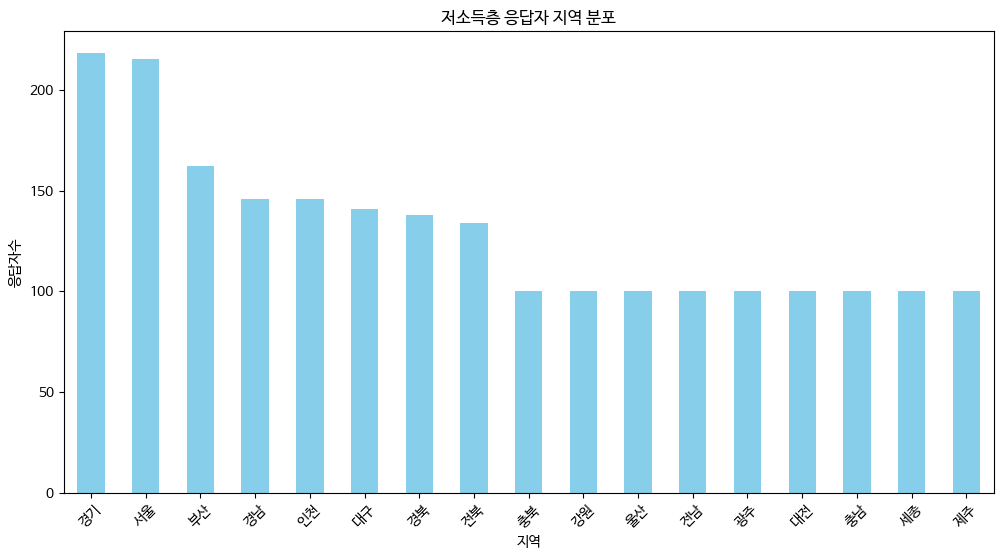

In [ ]:
df = pd.read_csv('4 저소득층_raw data.csv')
region_map = {
    1: '서울',
    2: '부산',
    3: '대구',
    4: '인천',
    5: '광주',
    6: '대전',
    7: '울산',
    8: '세종',
    9: '경기',
    10: '강원',
    11: '충북',
    12: '충남',
    13: '전북',
    14: '전남',
    15: '경북',
    16: '경남',
    17: '제주'
}

df['region_name'] = df['DDQ101'].map(region_map)

response_counts = df['region_name'].value_counts()

plt.figure(figsize=(12, 6))
response_counts.plot(kind='bar', color='skyblue')
plt.title('저소득층 응답자 지역 분포')
plt.xlabel('지역')
plt.ylabel('응답자수')
plt.xticks(rotation=45)
plt.show()

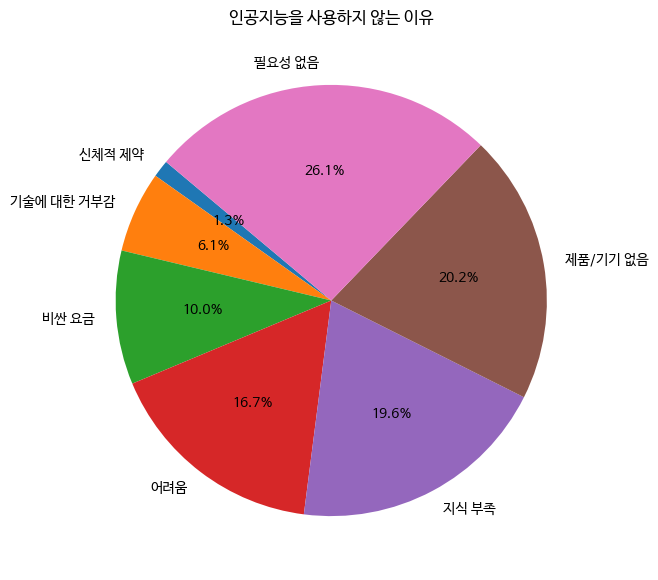

In [ ]:


#인공지능을 사용하지 않는 이유 / 지역별 분석
#인공지능을 사용하지 않는 이유: Q23A1~Q23A8
df_noAI = df.loc[:, 'Q23A1':'Q23A7']
df_noAI.replace(' ', np.nan, inplace=True)
df_noAI.head()
missing_values_count = df_noAI.isnull().sum()

exists_all = []
for i in missing_values_count:
  num = 2200 - i
  exists_all.append(num)

label = ["비싼 요금",
"지식 부족",
"제품/기기 없음",
"필요성 없음",
"어려움",
"기술에 대한 거부감",
"신체적 제약"]

exists_all

sorted_indices = np.argsort(exists_all)
sorted_exists_all = np.array(exists_all)[sorted_indices]
sorted_labels = np.array(label)[sorted_indices]

plt.figure(figsize=(10, 7))
plt.pie(sorted_exists_all, labels=sorted_labels, autopct='%1.1f%%', startangle=140)
plt.title('인공지능을 사용하지 않는 이유')
plt.show()

응답수가 차이나는것을 확인, 사용하지 않는 이유의 비율을 비교하기 위해 응답수를 100 으로 정규화


In [ ]:
#인공지능을 사용하지 않는 이유(지역별)

df_region = df_noAI.copy()
df_region['DDQ101'] = df['DDQ101']

region_map = {
    1: '서울',
    2: '부산',
    3: '대구',
    4: '인천',
    5: '광주',
    6: '대전',
    7: '울산',
    8: '세종',
    9: '경기',
    10: '강원',
    11: '충북',
    12: '충남',
    13: '전북',
    14: '전남',
    15: '경북',
    16: '경남',
    17: '제주'
}

df_region['DDQ101'] = df_region['DDQ101'].map(region_map)

# 결측값을 제외한 각 열별 값의 개수를 세고, 이를 지역별로 그룹화
df_region = df_region.groupby('DDQ101').apply(lambda x: x.notna().sum()).drop(columns='DDQ101')

columns = ["비싼 요금",
"지식 부족",
"제품 부재",
"불필요",
"어려움",
"기술거부감",
"신체적 제약"]

df_region.columns = columns

df_region

,비싼 요금,지식 부족,제품 부재,불필요,어려움,기술거부감,신체적 제약
DDQ101,,,,,,,
강원,14,29,36,16,7,6,2
경기,51,69,60,62,41,21,3
경남,37,28,51,86,55,20,2
경북,35,42,37,39,36,13,6
광주,8,24,46,47,28,2,2
대구,28,31,30,59,31,9,2
대전,19,21,25,28,20,10,1
부산,27,47,46,74,54,14,1
서울,19,69,67,78,41,30,1


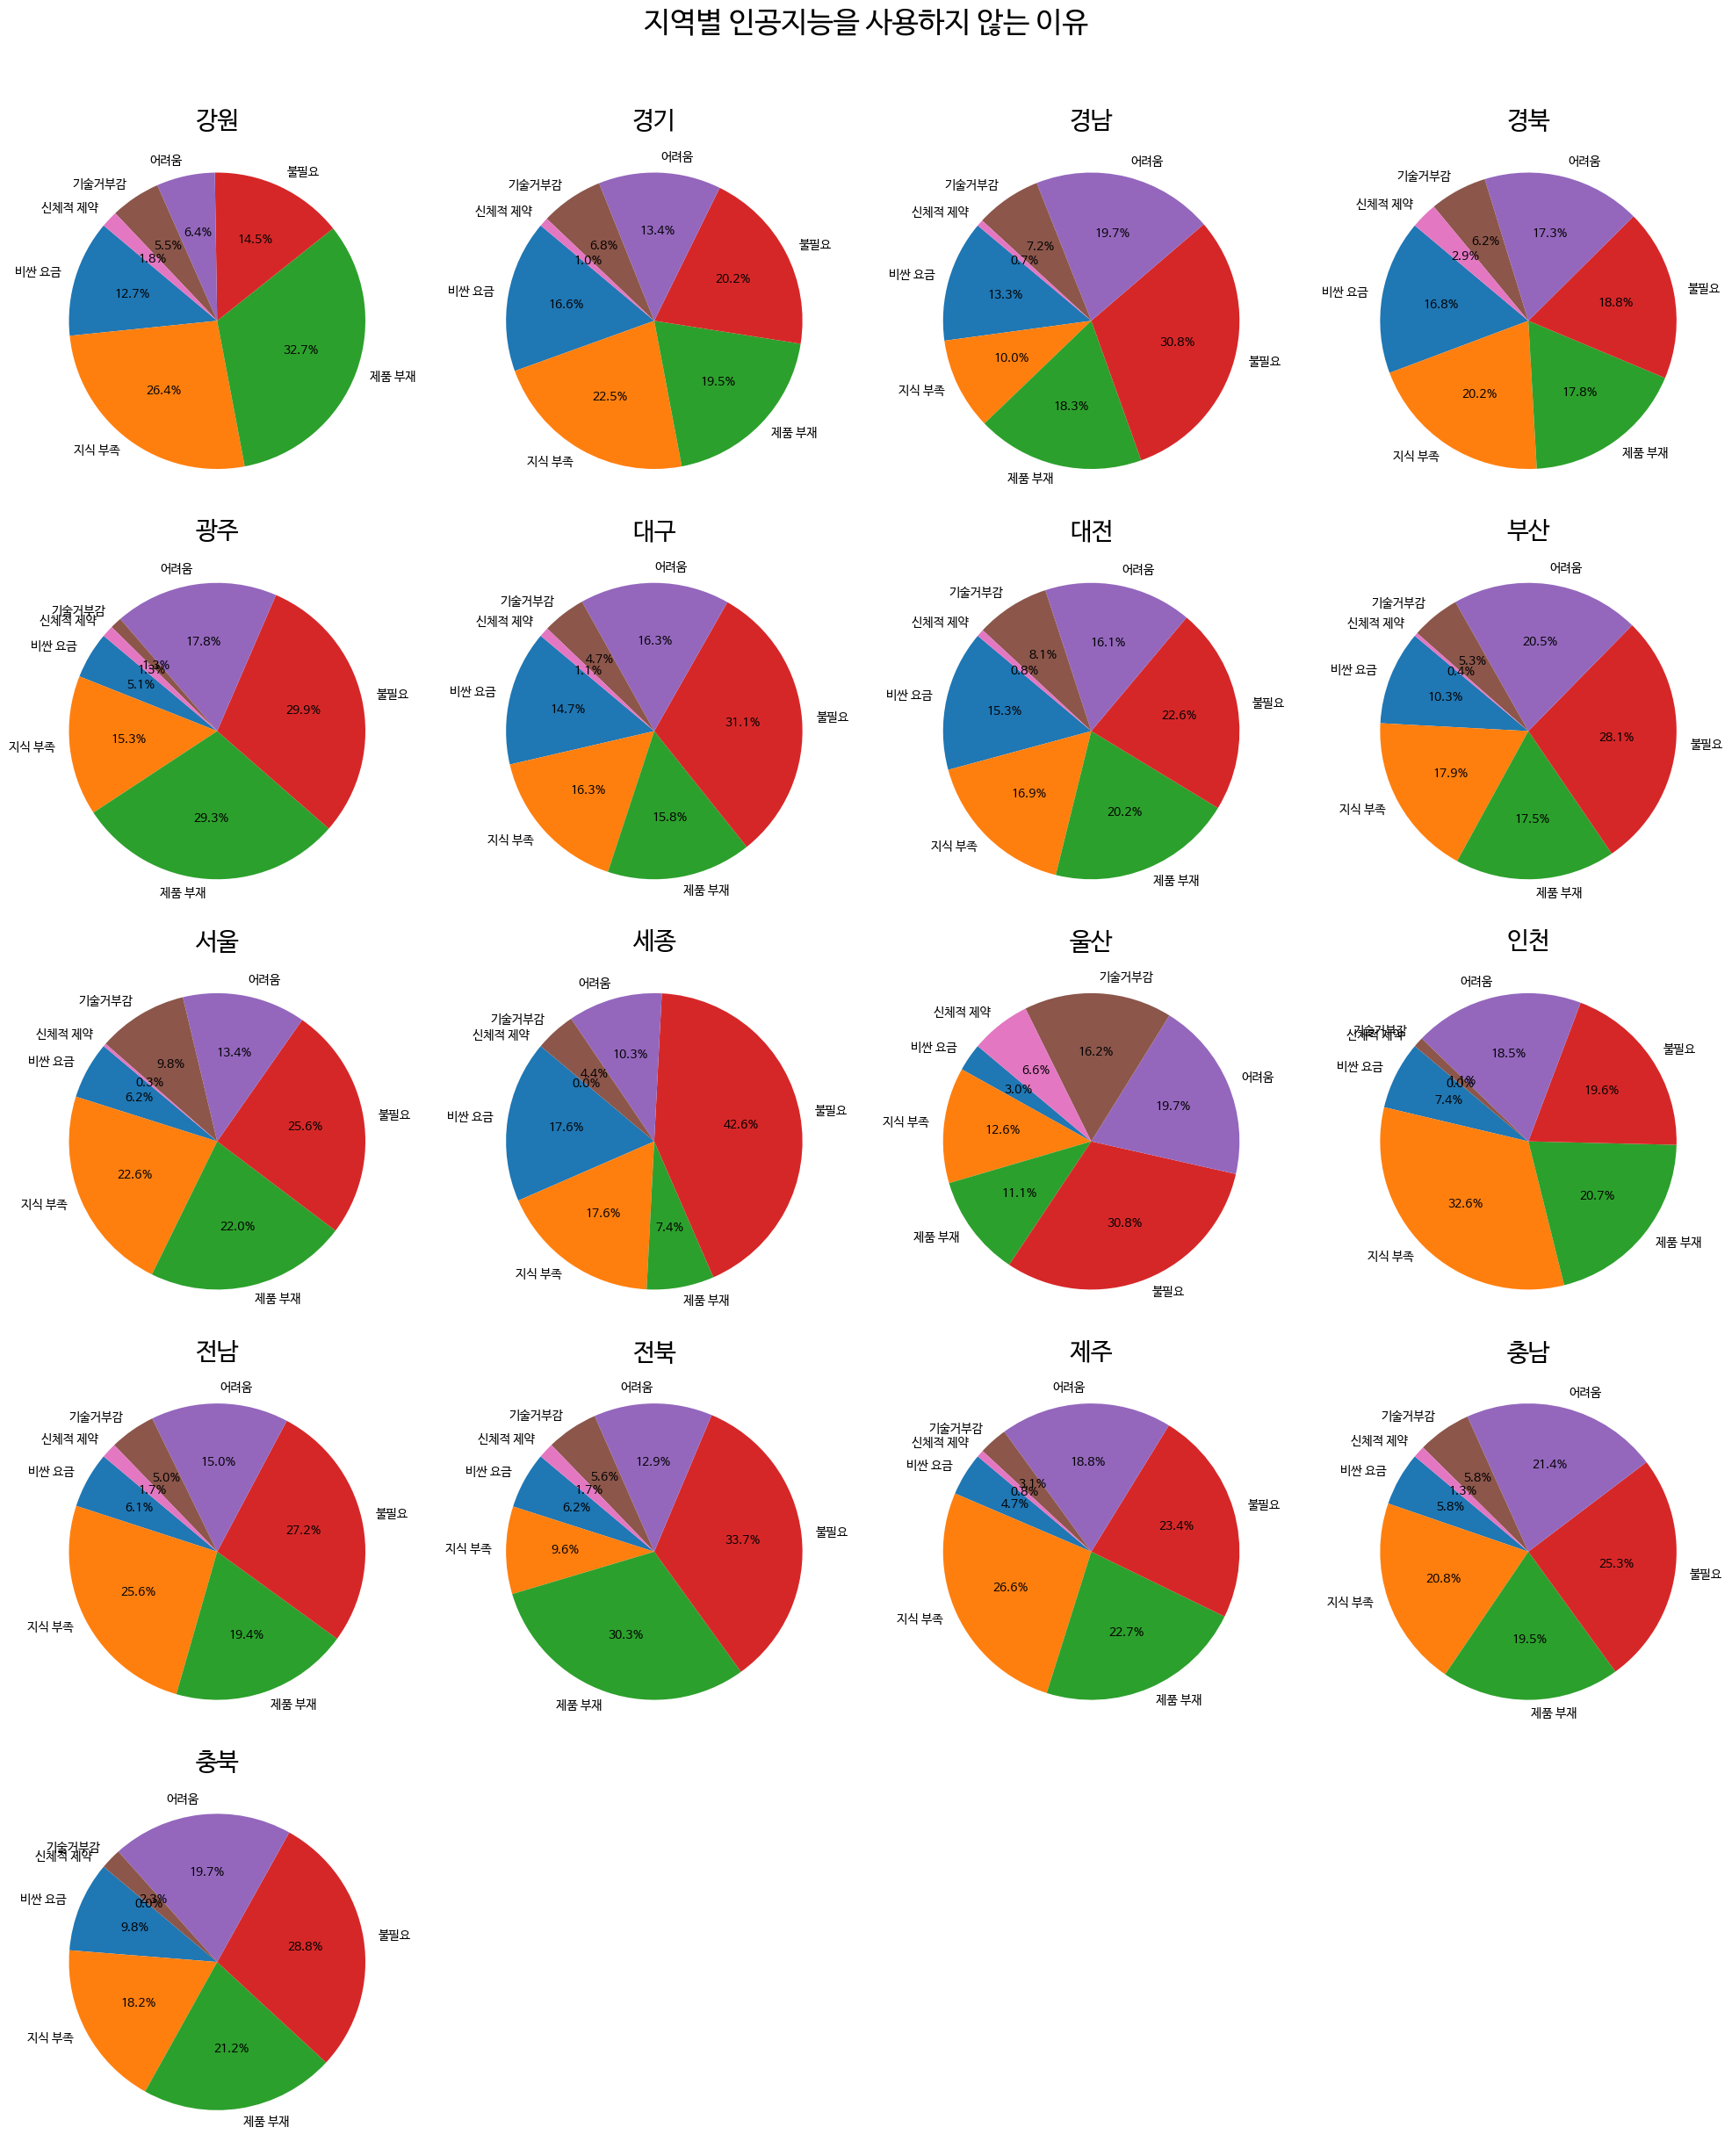

In [ ]:
# 파이차트 그리기
labels = df_region.columns
num_pies = len(df_region)
cols = 4
rows = (num_pies + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, (region, row) in enumerate(df_region.iterrows()):
    values = row  # row의 모든 값 사용
    axes[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(region, fontstyle='italic', fontsize=20)  # 제목 글씨 기울이기 및 크기 조정


# 나머지 빈 플롯 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('지역별 인공지능을 사용하지 않는 이유', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

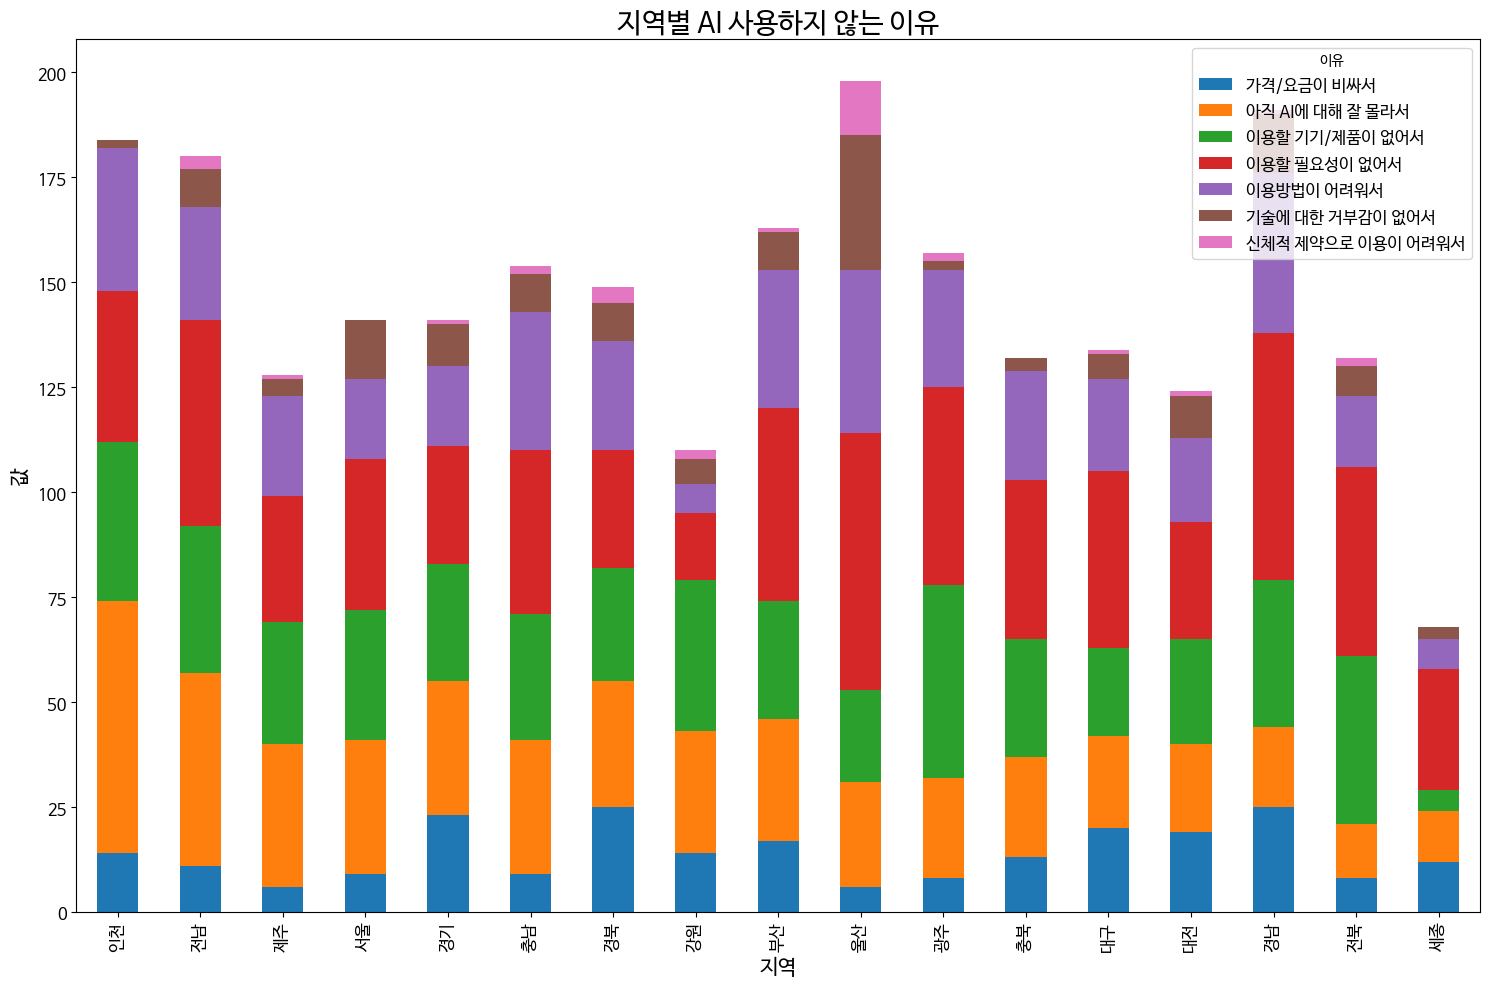

In [ ]:
#인공지능을 사용하지 않는 이유(지역별)

df_region2 = df_noAI.copy()
df_region2['DDQ101'] = df['DDQ101']

region_map = {
    1: '서울',
    2: '부산',
    3: '대구',
    4: '인천',
    5: '광주',
    6: '대전',
    7: '울산',
    8: '세종',
    9: '경기',
    10: '강원',
    11: '충북',
    12: '충남',
    13: '전북',
    14: '전남',
    15: '경북',
    16: '경남',
    17: '제주'
}

df_region2['DDQ101'] = df_region2['DDQ101'].map(region_map)

region_counts = df_region2['DDQ101'].value_counts()

region_q23_counts = df_region2.groupby('DDQ101').apply(lambda x: x.notnull().sum())

region_normalized = (region_q23_counts.div(region_counts, axis=0) * 100).round()

region_normalized.drop(['DDQ101'], axis=1, inplace=True)

columns = [
    '가격/요금이 비싸서',
    '아직 AI에 대해 잘 몰라서',
    '이용할 기기/제품이 없어서',
    '이용할 필요성이 없어서',
    '이용방법이 어려워서',
    '기술에 대한 거부감이 없어서',
    '신체적 제약으로 이용이 어려워서',
]

region_normalized.columns = columns

df = region_normalized

df_sorted = df.sort_values(by='아직 AI에 대해 잘 몰라서', ascending=False)

fig, ax = plt.subplots(figsize=(15, 10))

df_sorted.plot(kind='bar', stacked=True, ax=ax, fontsize=12)

ax.set_title('지역별 AI 사용하지 않는 이유', fontsize=20)
ax.set_xlabel('지역', fontsize=15)
ax.set_ylabel('값', fontsize=15)
ax.legend(title='이유', fontsize=12)

plt.tight_layout()
plt.show()

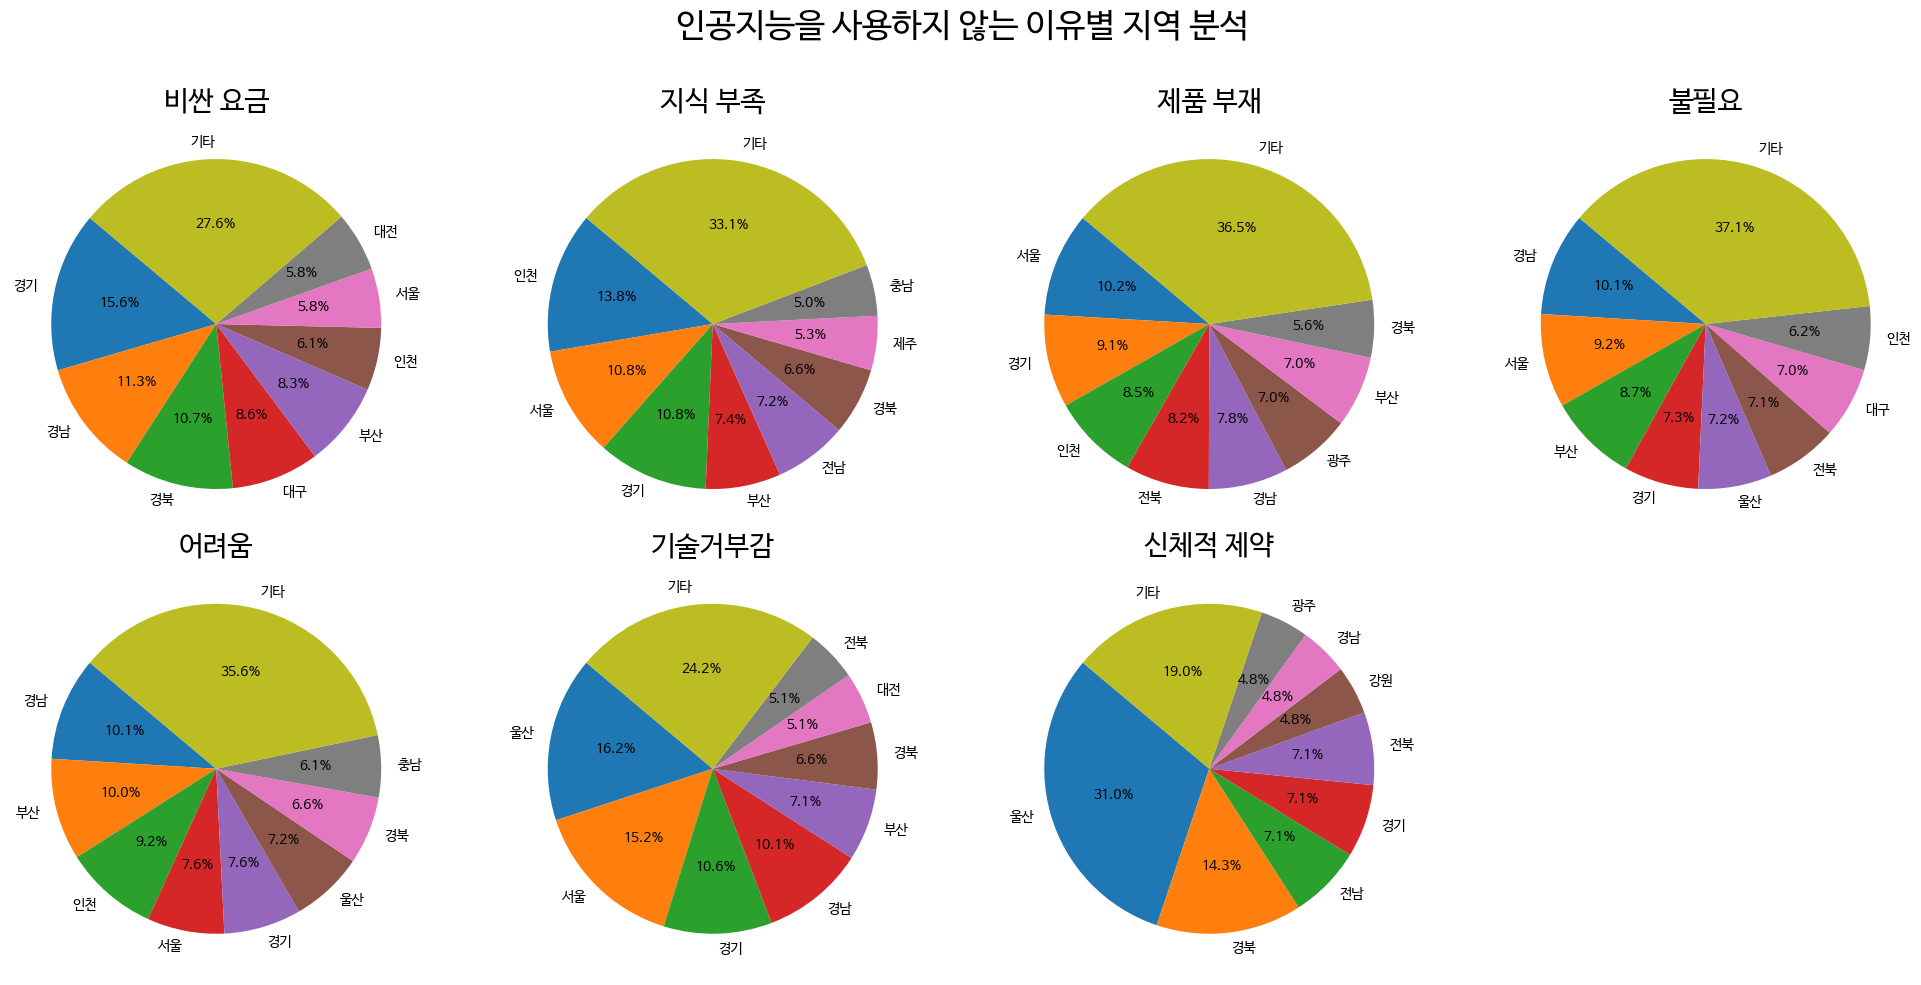

In [ ]:
# 파이차트 그리기
num_reasons = len(df_region.columns)
cols = 4
rows = (num_reasons + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, reason in enumerate(df_region.columns):
    values = df_region[reason].sort_values(ascending=False)
    top_values = values[:8]
    other_values = values[8:].sum()

    labels = top_values.index.tolist() + ['기타']
    sizes = top_values.tolist() + [other_values]

    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(reason, fontstyle='italic', fontsize=20)  # 제목 글씨 기울이기 및 크기 조정
# 나머지 빈 플롯 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('인공지능을 사용하지 않는 이유별 지역 분석', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

각 이유별로 상위 8개 지역 표현, 나머지는 기타로

원웅


In [ ]:
# 데이터 불러오기
df = pd.read_csv('4 저소득층_raw data.csv')

df.replace(' ', np.nan, inplace=True)
df_dropped = df.dropna(subset=['Q7A1'])
df_dropped = df.dropna(subset=['Q7A3'])


select = ['Q7A1','Q7A3','DDQ1','DDQ2','DDQ3','DDQ4']
data = df_dropped[select]
data1 = df_dropped[select]
data['Q7A1'] = pd.to_numeric(data['Q7A1'])
data['Q7A3'] = pd.to_numeric(data['Q7A3'])
data1['Q7A3'] = pd.to_numeric(data['Q7A3'])
data.sort_values(by='Q7A1', ascending=True)
data1.sort_values(by='Q7A3', ascending=True)

,Q7A1,Q7A3,DDQ1,DDQ2,DDQ3,DDQ4
0,0,0,58,1,4,3
1311,0,0,62,1,14,1
1310,0,0,39,1,14,2
1309,0,0,72,1,14,1
1308,0,0,68,1,14,3
...,...,...,...,...,...,...
26,30,30,44,2,4,4
109,10,30,16,1,12,2
422,0,30,13,2,12,1
478,20,31,26,2,9,3


### 나이, 학력, 직업별 태블릿 , 데스크탑 이용 일수 예측


---



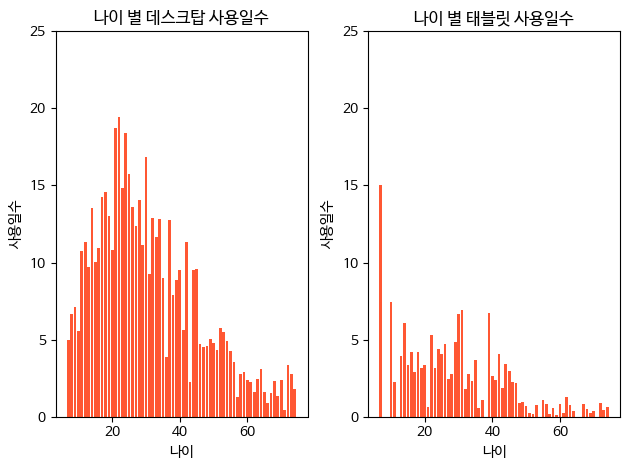

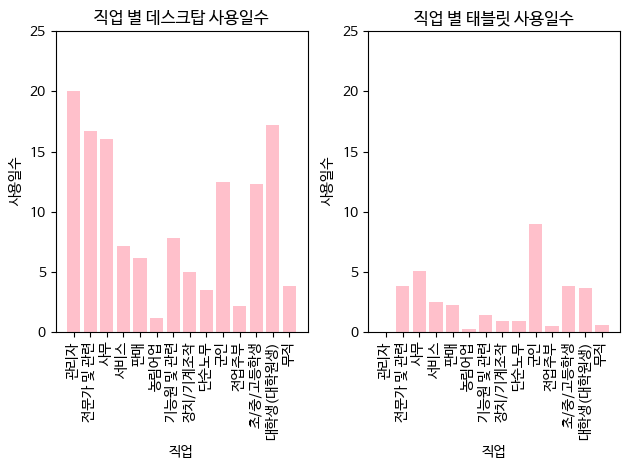

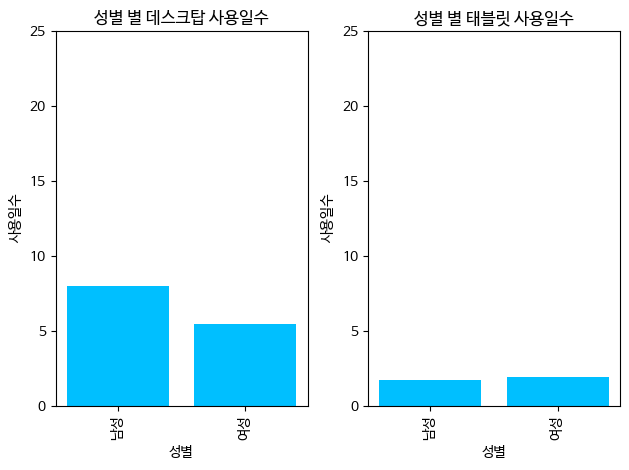

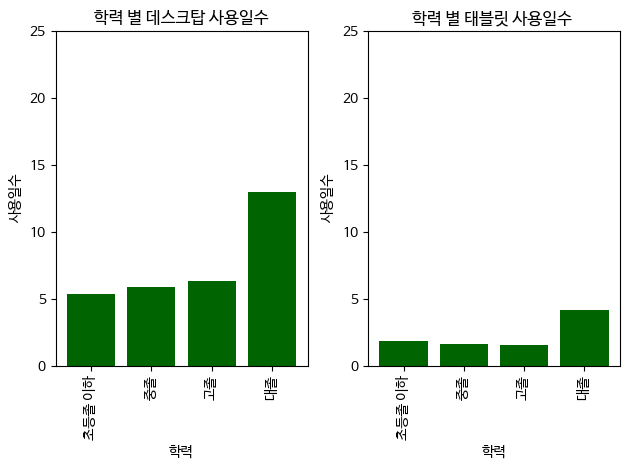

In [ ]:
plt.subplot(1, 2, 1)
plt.bar(data.groupby(['DDQ1']).mean().index, data.groupby(['DDQ1']).mean()['Q7A1'],color='#FF5733')
plt.title(' 나이 별 데스크탑 사용일수 ')
plt.xlabel('나이')
plt.ylabel('사용일수')
plt.ylim([0, 25])

plt.subplot(1,2,2)
plt.bar(data1.groupby(['DDQ1']).mean().index, data1.groupby(['DDQ1']).mean()['Q7A3'],color='#FF5733')
plt.title(' 나이 별 태블릿 사용일수 ')
plt.xlabel('나이')
plt.ylabel('사용일수')
plt.ylim([0, 25])
plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
plt.bar(data.groupby(['DDQ3']).mean().index, data.groupby(['DDQ3']).mean()['Q7A1'],color='pink')
plt.xticks(np.arange(1, 15, 1).tolist(),
 ['관리자','전문가 및 관련','사무','서비스','판매','농림어업','기능원 및 관련','장치/기계조작','단순노무','군인','전업주부','초/중/고등학생','대학생(대학원생)','무직'],rotation=90)
plt.title(' 직업 별 데스크탑 사용일수 ')
plt.xlabel('직업',)
plt.ylabel('사용일수')
plt.ylim([0, 25])

plt.subplot(1,2,2)
plt.bar(data1.groupby(['DDQ3']).mean().index, data1.groupby(['DDQ3']).mean()['Q7A3'],color='pink')
plt.xticks(np.arange(1, 15, 1).tolist(),
 ['관리자','전문가 및 관련','사무','서비스','판매','농림어업','기능원 및 관련','장치/기계조작','단순노무','군인','전업주부','초/중/고등학생','대학생(대학원생)','무직'],rotation=90)
plt.title(' 직업 별 태블릿 사용일수 ')
plt.xlabel('직업')
plt.ylabel('사용일수')
plt.ylim([0, 25])
plt.tight_layout()
plt.show()


plt.subplot(1, 2, 1)
plt.bar(data.groupby(['DDQ2']).mean().index, data.groupby(['DDQ2']).mean()['Q7A1'],color='deepskyblue')
plt.title(' 성별 별 데스크탑 사용일수 ')
plt.xticks(np.arange(1, 3, 1).tolist(),
 ['남성','여성'],rotation=90)
plt.xlabel('성별')
plt.ylabel('사용일수')
plt.ylim([0, 25])

plt.subplot(1,2,2)
plt.bar(data1.groupby(['DDQ2']).mean().index, data1.groupby(['DDQ2']).mean()['Q7A3'],color='deepskyblue')
plt.title(' 성별 별 태블릿 사용일수 ')
plt.xticks(np.arange(1, 3, 1).tolist(),
 ['남성','여성'],rotation=90)
plt.xlabel('성별')
plt.ylabel('사용일수')
plt.ylim([0, 25])
plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
plt.bar(data.groupby(['DDQ4']).mean().index, data.groupby(['DDQ4']).mean()['Q7A1'],color='darkgreen')
plt.title(' 학력 별 데스크탑 사용일수 ')
plt.xticks(np.arange(1, 5, 1).tolist(),
 ['초등졸 이하','중졸','고졸','대졸'],rotation=90)
plt.xlabel('학력')
plt.ylabel('사용일수')
plt.ylim([0, 25])

plt.subplot(1,2,2)
plt.bar(data1.groupby(['DDQ4']).mean().index, data1.groupby(['DDQ4']).mean()['Q7A3'],color='darkgreen')
plt.title('학력 별 태블릿 사용일수 ')
plt.xticks(np.arange(1, 5, 1).tolist(),
 ['초등졸 이하','중졸','고졸','대졸'],rotation=90)
plt.xlabel('학력')
plt.ylabel('사용일수')
plt.ylim([0, 25])
plt.tight_layout()
plt.show()

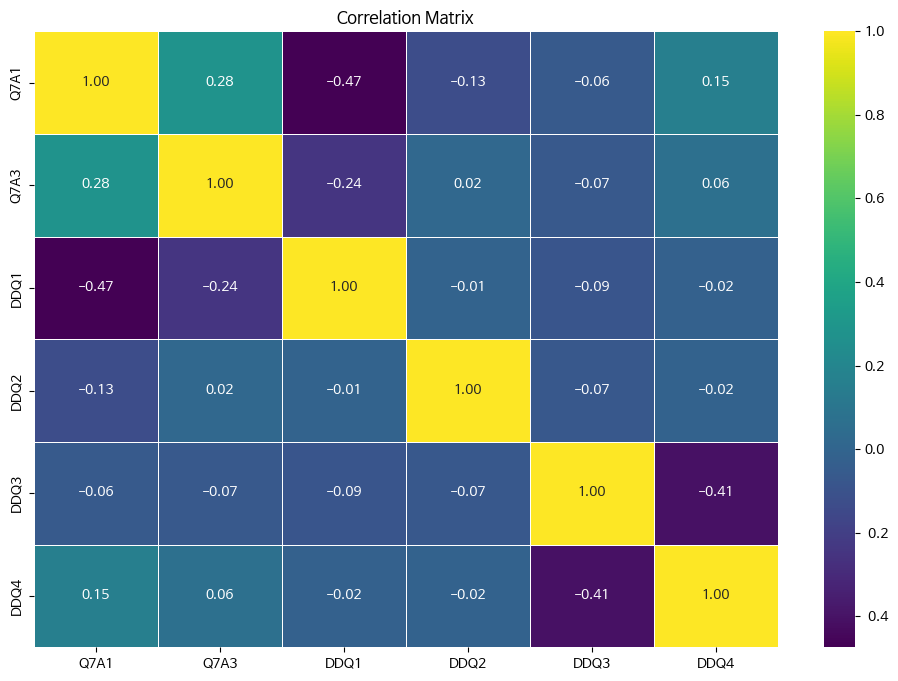

,Q7A1,Q7A3,DDQ1,DDQ2,DDQ3,DDQ4
Q7A1,1.000000,0.281012,-0.474418,-0.133713,-0.064378,0.153548
Q7A3,0.281012,1.000000,-0.244341,0.017258,-0.070395,0.062791
DDQ1,-0.474418,-0.244341,1.000000,-0.012586,-0.088036,-0.022266
DDQ2,-0.133713,0.017258,-0.012586,1.000000,-0.073910,-0.017466
DDQ3,-0.064378,-0.070395,-0.088036,-0.073910,1.000000,-0.409052
DDQ4,0.153548,0.062791,-0.022266,-0.017466,-0.409052,1.000000


In [ ]:
hit = data
corr_matrix = hit.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))  # 사이즈 조정
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

corr_matrix

In [ ]:
# 레이블 데이터셋
label1 = data[['Q7A1']]
data_train_ = data.drop(columns=["Q7A1","Q7A3"])
label1 = label1.to_numpy()


# 레이블 데이터셋
label2 = data[['Q7A3']]
label2 = label2.to_numpy()

# # 데이터 분할
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_train_,
                                                        label1,
                                                        test_size=0.2,
                                                        random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(data_train_,
                                                        label2,
                                                        test_size=0.2,
                                                        random_state=42)


<H2> 사용일수 예측 시도


In [ ]:
model1 = LinearRegression()

model2 = LinearRegression()

model1.fit(X_train1, y_train1)

model2.fit(X_train2, y_train2)

print("데스크탑 기울기(회귀 계수):", model1.coef_)
print("절편:", model1.intercept_)
print()
print("태블릿 기울기(회귀 계수):", model2.coef_)
print("절편:", model2.intercept_)

y_test1 = sorted(y_test1)
y_test2 = sorted(y_test2)
y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)
y_pred1 = sorted(y_pred1)
y_pred2 = sorted(y_pred2)

데스크탑 기울기(회귀 계수): [[-0.23497537 -2.7057017  -0.1685828   1.35510134]]
절편: [19.73246892]

태블릿 기울기(회귀 계수): [[-0.07122417 -0.05787795 -0.10564641  0.17578734]]
절편: [5.66760413]


In [ ]:
from re import X
mse1 = mean_squared_error(y_test1, y_pred1)
r1 = r2_score(y_test1, y_pred1)

print(f"데스크탑 Mean Squared Error: {mse1}")
print(f"R^2 Score: {r1}")

mse2 = mean_squared_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)
print()
print(f"태블릿 Mean Squared Error: {mse2}")
print(f"R^2 Score: {r2}")

데스크탑 Mean Squared Error: 34.82395815188535
R^2 Score: 0.602696759617926

태블릿 Mean Squared Error: 30.325086073623858
R^2 Score: 0.1872528872359659


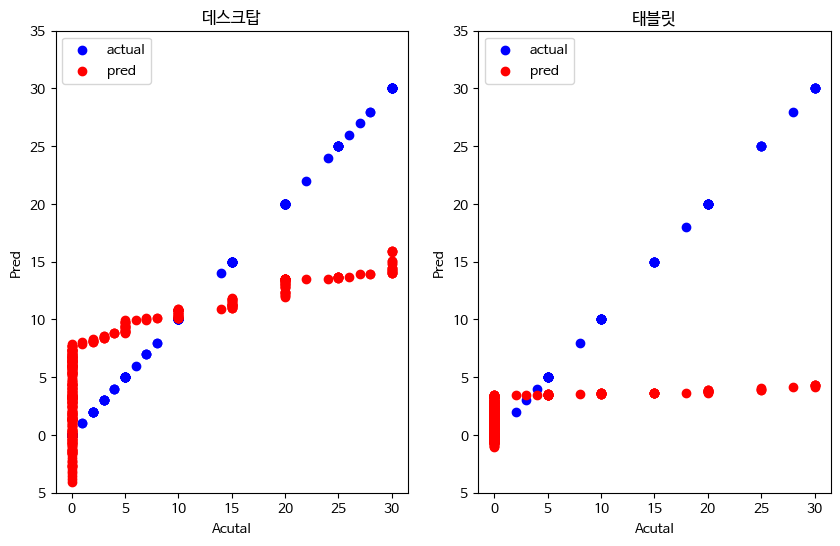

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.scatter(y_test1, y_test1, color='blue', label = 'actual')
plt.scatter(y_test1, y_pred1, color='red',label = 'pred')
plt.xlabel('Acutal')
plt.ylabel('Pred')
plt.title('데스크탑')
plt.legend(loc='upper left')
plt.ylim([-5, 35])

plt.subplot(1,2,2)
plt.scatter(y_test2, y_test2, color='blue',label = 'actual')
plt.scatter(y_test2, y_pred2, color='red',label = 'pred')
plt.xlabel('Acutal')
plt.ylabel('Pred')
plt.title('태블릿')
plt.ylim([-5, 35])
plt.legend(loc='upper left')
plt.show()

<H2> 나이를 통한 많은기기사용 선호 분류  (선호하지 않으면 0 , 선호하면 1)

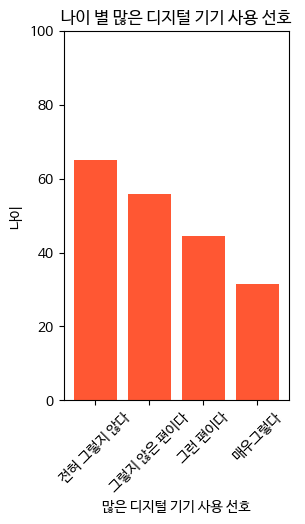

예측 정확도: 0.7182



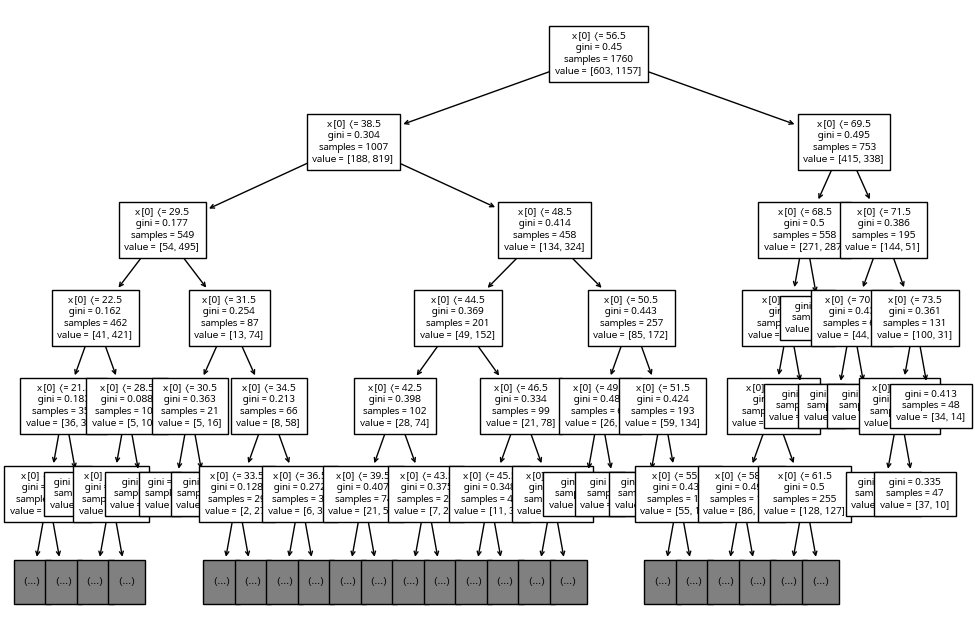

교차 검증별 정확도: [0.6798 0.7449 0.6139]
평균 검증 정확도: 0.6795


In [ ]:
df_dropped = df.dropna(subset=['Q18A4'])

select = ['Q18A4','DDQ1']
data_ = df_dropped[select]

plt.subplot(1, 2, 1)
plt.bar(data_.groupby(['Q18A4']).mean().index, data_.groupby('Q18A4').mean(numeric_only=True)['DDQ1'],color='#FF5733')
plt.title(' 나이 별 많은 디지털 기기 사용 선호 ')
plt.xlabel('많은 디지털 기기 사용 선호')
plt.ylabel('나이')
plt.ylim([0, 100])
plt.xticks(np.arange(1, 5, 1).tolist(),
 ['전혀 그렇지 않다','그렇지 않은 편이다','그런 편이다','매우그렇다'],rotation=45)
plt.show()


label3 = data_['Q18A4'].apply(lambda x: 1 if x > 2 else 0)
data_ = data_.drop(columns=['Q18A4'])

label3 = label3.to_numpy()
dt_clf = DecisionTreeClassifier(random_state=200)
# 데이터셋의 20%를 테스트 데이터로 사용
X_train, X_test, y_train, y_test = train_test_split(
                                 data_,
                                 label3,
                                 test_size=0.2,
                                 random_state=200
                                 )

# 학습 수행
dt_clf.fit(X_train, y_train)

# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트 로 예측 수행.
pred = dt_clf.predict(X_test)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))
print()

plt.figure(figsize=(12, 8))
plot_tree(dt_clf, max_depth=5, fontsize=7)
plt.show()
scores = cross_val_score(dt_clf , data_, label3 ,
scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

### 민지


In [ ]:
df=pd.read_csv('4 저소득층_raw data.csv')
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Columns: 250 entries, ID to WT_T
dtypes: float64(1), int64(121), object(128)
memory usage: 4.2+ MB


ID        0
TYP       0
Q1A1      0
Q1A2      0
Q2A11     0
         ..
DDQ9      0
DDQ101    0
DDQ102    0
DDQ103    0
WT_T      0
Length: 250, dtype: int64

In [ ]:
df['Q1A1'].value_counts()

Q1A1
2    1150
1    1050
Name: count, dtype: int64

In [ ]:
df['Q1A2'].value_counts()

Q1A2
2    1682
1     518
Name: count, dtype: int64

In [ ]:
# 공백 비율 계산
whitespace_percentage = (df == ' ').mean() * 100

# 공백 비율이 90% 이상인 열 제거
cols_to_drop = whitespace_percentage[whitespace_percentage >= 90].index
df = df.drop(cols_to_drop, axis=1)

# 제거된 열 출력
#removed_columns = df.columns.difference(df_cleaned.columns)
#print("Removed columns:")
#print(removed_columns)


<H1> PC와 노트북의 보유 정도

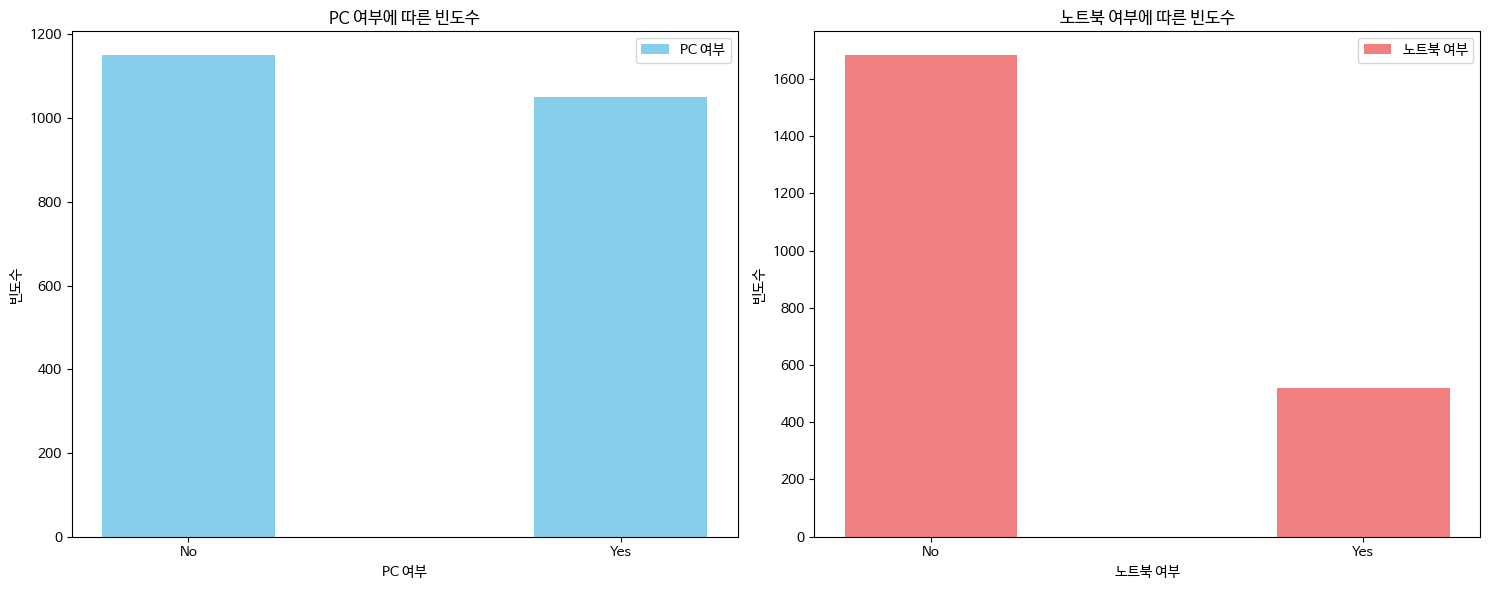

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 열 이름 변경
df = df.rename(columns={'Q1A1': 'PC 여부', 'Q1A2': '노트북 여부'})

#:1 -> 'Yes', 2 -> 'No'
df['PC 여부'] = df['PC 여부'].replace({1: 'Yes', 2: 'No'})
df['노트북 여부'] = df['노트북 여부'].replace({1: 'Yes', 2: 'No'})

# 각 열의 값이 'Yes'와 'No'로 구분된 빈도수 계산
pc_counts = df['PC 여부'].value_counts().sort_index()
laptop_counts = df['노트북 여부'].value_counts().sort_index()

# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.bar(pc_counts.index, pc_counts.values, width=0.4, label='PC 여부', color='skyblue')
ax1.set_title('PC 여부에 따른 빈도수')
ax1.set_xlabel('PC 여부')
ax1.set_ylabel('빈도수')
ax1.set_xticks(['No', 'Yes'])
ax1.legend()

ax2.bar(laptop_counts.index, laptop_counts.values, width=0.4, label='노트북 여부', color='lightcoral')
ax2.set_title('노트북 여부에 따른 빈도수')
ax2.set_xlabel('노트북 여부')
ax2.set_ylabel('빈도수')
ax2.set_xticks(['No', 'Yes'])
ax2.legend()

plt.tight_layout()
plt.show()


응답자중 PC, 노트북 모두 안가지고 있는 사람이 많았으며, 노트북의 경우가 편차가 더 크게 나옴  

이후 분류에서 노트북과 PC를 모두 가진 사람을 기준으로 함



In [ ]:
df['PC 와 노트북 여부'] = df.apply(lambda row: 1 if row['PC 여부'] == 'Yes' and row['노트북 여부'] == 'Yes' else 2, axis=1)

# 결과 확인
print(df)

          ID  TYP PC 여부 노트북 여부 Q2A11  Q2A2  Q2A3  Q3  Q4A1  Q4A2  ...  DDQ8A1  \
0     401176    4   Yes    Yes     1     2     2   1     1     1  ...       1   
1     413395    4   Yes    Yes     1     2     2   1     2     3  ...           
2     401003    4   Yes    Yes     1     2     2   1     1     1  ...           
3     401126    4   Yes    Yes     1     2     2   1     2     2  ...           
4     401263    4   Yes    Yes     1     2     2   1     3     3  ...           
...      ...  ...   ...    ...   ...   ...   ...  ..   ...   ...  ...     ...   
2195  406037    4    No     No     1     2     2   1     1     1  ...       1   
2196  406661    4    No     No     1     2     2   1     1     1  ...       1   
2197  406663    4    No     No     1     2     2   1     1     1  ...       1   
2198  406665    4    No     No     1     2     2   1     1     1  ...       1   
2199  404131    4    No     No           2     2   1     1     1  ...           

      DDQ8A2  DDQ8A3  DDQ8A

In [ ]:
df['PC 와 노트북 여부'].value_counts()

PC 와 노트북 여부
2    1926
1     274
Name: count, dtype: int64

<H1> 정보 역량 지표 와 PC보유 간의 상관 관계  
<H2>가설 : 정보 역량이 높은 사람이 PC보유율이 크다

문29. 정보 역량 지표_1) 나는 PC에 프로그램을 설치/삭제/업그레이드 하거나 파일, 폴더를 복사/삭제/이동/변경 할 수 있다

문29. 정보 역량 지표_2) 스마트 기기에서 앱을 설치하고 삭제 또는 업데이트를 할 수 있다

문29. 정보 역량 지표_3) 스마트 기기의 계산기, 일정관리(스케줄러), 주소록 등의 도구용 앱을 이용할 수 있다

문29. 정보 역량 지표_4) 비대면 원격회의 앱(구글Meet, Zoom 등)을 이용해 회의를 개최/참여할 수 있다

문29. 정보 역량 지표_5) 스마트폰과 연동되는 스마트워치(갤럭시워치, 애플워치), 스마트냉장고, 사물인터넷(IoT)기기를 활용할 수 있다

문29. 정보 역량 지표_6) 여러 자료를 비교하는 등 검색 결과에서 믿을만한 정보를 구별할 수 있다

문29. 정보 역량 지표_7) 허위조작정보(가짜뉴스)인지를 가려내기 위해 관련된 참고자료나 정보를 찾아 활용할 수 있다

문29. 정보 역량 지표_8) 유해한 정보(음란물, 범죄나 폭력적 내용 등)를 거르는 데 필요한 스마트폰의 설정변경 기능(필터링)을 사용할 줄 안다

문29. 정보 역량 지표_9) 드라마, 애니메이션, 뮤직비디오, 영화 등 기존 영상 콘텐츠를 동영상이나 GIF 같은 다른 형식의 콘텐츠로 바꿀 수 있다

문29. 정보 역량 지표_10) 온라인 협업프로그램(구글닥스 등)을 이용해 다른 사람들과 함께 과제나 업무를 할 수 있다

문29. 정보 역량 지표_11) 온라인 간편결제(네이버페이, 카카오페이 등)를 이용해 물건을 살 수 있다

문29. 정보 역량 지표_12) 내비게이션, 온라인 지도서비스(카카오맵, 네이버지도, 구글맵 등) 및 교통정보를 이용해 길을 찾을 수 있다

문30. 정보 역량 지표_1) 인터넷에서 나의 관심사와 비슷한 커뮤니티(온라인 카페 등)를 찾아 참여할 수 있다

문30. 정보 역량 지표_2) 온라인에서 일어나는 정치/사회 문제에 대해 토론하거나 서명/청원 등을 할 수 있다

문30. 정보 역량 지표_3) PC나 스마트폰 등의 잠금장치 등과 같은 보안설정을 할 수 있다

문30. 정보 역량 지표_4) PC/스마트폰/태블릿PC에서 쿠키 및 방문기록을 삭제할 수 있다

문30. 정보 역량 지표_5) 소셜미디어나 게시판 등에 글을 쓸 때 공개범위를 설정할 수 있다

문30. 정보 역량 지표_6) 나에 대한 모욕이나 명예훼손 글이 온라인에 있을 때 임시조치 하는 방법을 안다

문30. 정보 역량 지표_7) 포털이나 소셜미디어에서 누군가 내 권리(명예훼손, 저작권침해 등)를 침해했을 때 신고하는 방법을 안다


In [ ]:
x=df[['Q29A01','Q29A02','Q29A03','Q29A04','Q29A05','Q29A06','Q29A07','Q29A08','Q29A09','Q29A10','Q29A11','Q29A12','Q30A1','Q30A2','Q30A3','Q30A4','Q30A5','Q30A6','Q30A7']]
y=df['PC 와 노트북 여부']

응답 데이터의 분포 확인

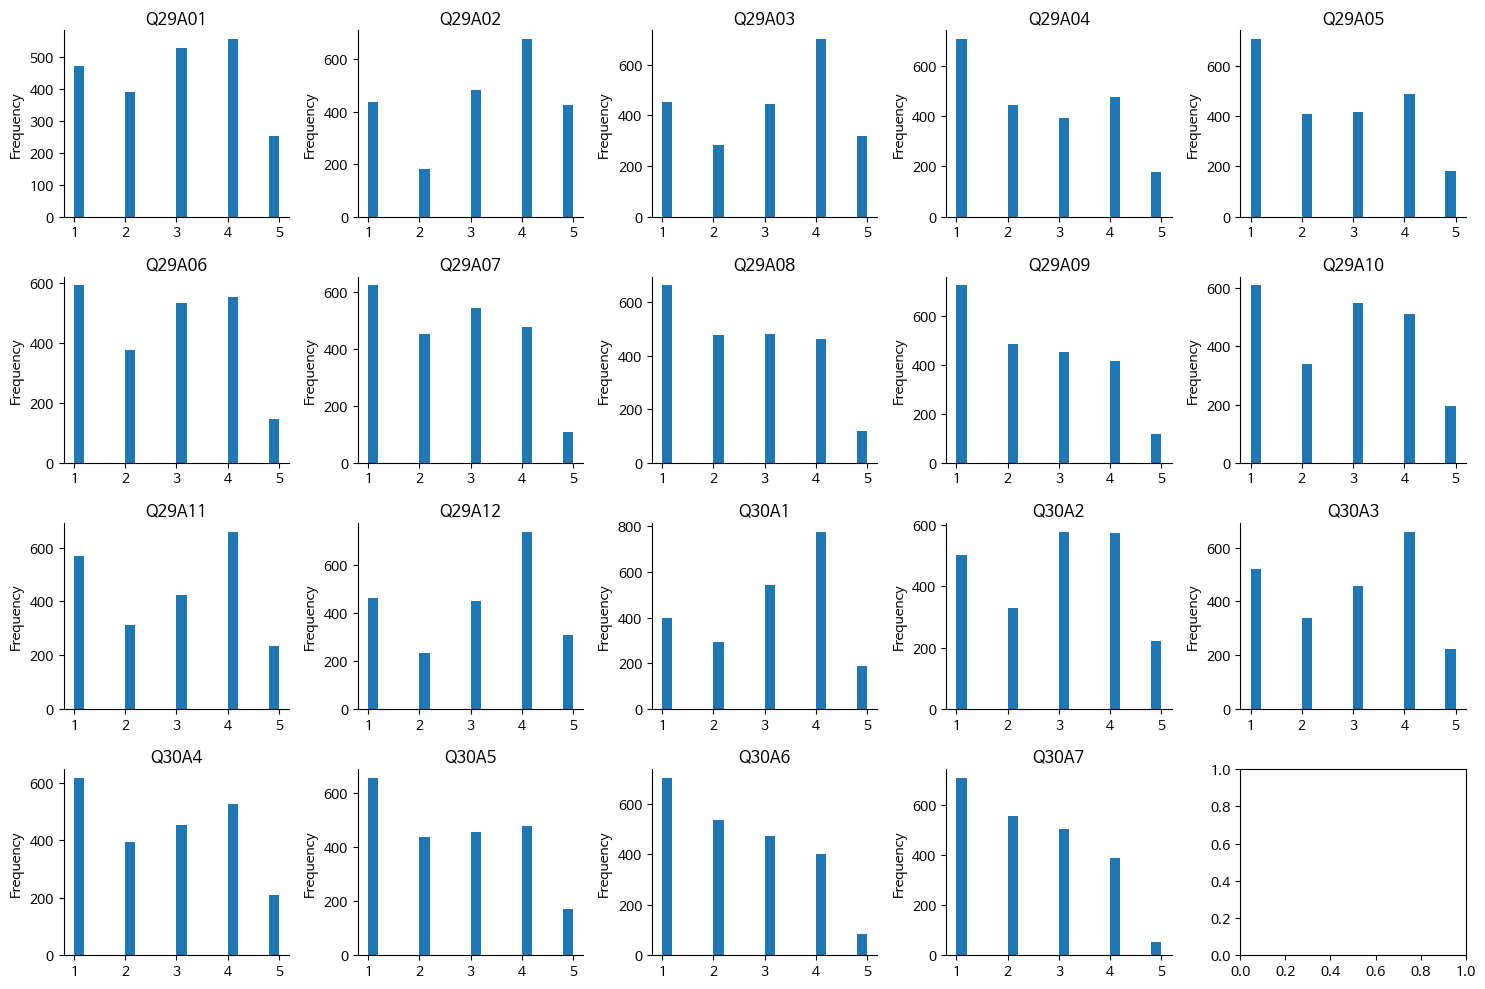

In [ ]:
# 데이터 타입을 숫자로 변환
x = x.apply(pd.to_numeric)

# 서브플롯 설정
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))

# 각 열의 히스토그램 그리기
for i, column in enumerate(x.columns):
    ax = axes[i // 5, i % 5]
    x[column].plot(kind='hist', bins=20, title=column, ax=ax)
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xticks([1, 2, 3, 4, 5])  # x축 틱 설정

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델 선택 및 훈련
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy:.2f}')

모델 정확도: 0.81


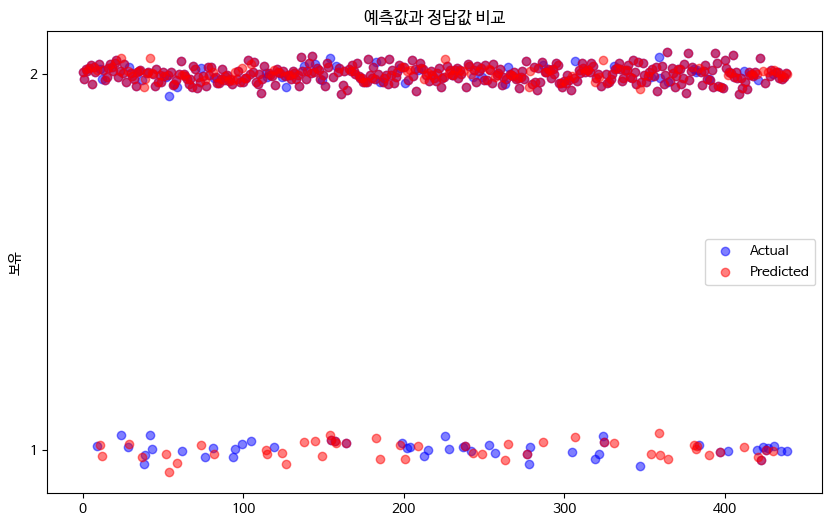

In [ ]:

import numpy as np

# 점의 위치를 약간 조정하여 시각화
jitter = np.random.normal(0, 0.02, size=len(y_test))

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test + jitter, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred + jitter, color='red', label='Predicted', alpha=0.5)
plt.title('예측값과 정답값 비교')
plt.xlabel('')
plt.ylabel('보유')
plt.yticks([1, 2])
plt.legend()
plt.show()


In [ ]:
## 교차 검증

from sklearn.model_selection import StratifiedKFold

# Stratified K-Fold 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 모델 초기화
model = DecisionTreeClassifier(random_state=42)

# 교차 검증 수행
accuracies = []

for train_index, test_index in skf.split(x, y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Fold 정확도: {accuracy:.2f}')

# 평균 정확도 계산
mean_accuracy = sum(accuracies) / len(accuracies)
print(f'평균 정확도: {mean_accuracy:.2f}')

Fold 정확도: 0.78
Fold 정확도: 0.78
Fold 정확도: 0.79
Fold 정확도: 0.81
Fold 정확도: 0.80
평균 정확도: 0.79


<H2> 결과 : 가설에 맞게 높은 분류 정확도를 보임 -> 정보 역량이 높은 사람이 PC를 많이 갖게 되는지, PC가 있는 사람이 높은 정보역량을 가지는지에 대한 선후관계는 알수 없으나, 둘 사이의 유의미한 관계가 있음.

<H1>  여러 특징에 따른 데스크탑 보유율


연령, 성별, 직업, 최종 학력, 가구주와의 관계, 가구원 수, 가구거주형태, 가구 월평균 소득 , 현재거주지역, 지역구분(시/군), 지역구분(읍,면,동)

In [ ]:
df = df.rename(columns={'DDQ1': '연령', 'DDQ2': '성별','DDQ3': '직업', 'DDQ4': '최종 학력','DDQ5': '가구주와의 관계', 'DDQ6': '가구원 수','DDQ7': '가구거주형태', 'DDQ8': '가구구성형태','DDQ9': '가구 월평균 소득', 'DDQ101': '현재거주지역', 'DDQ102': '지역구분(시/군)', 'DDQ103': '지역구분(읍,면,동)'})

In [ ]:
# 모든 공백을 0으로 대체
df = df.replace(' ', 0)

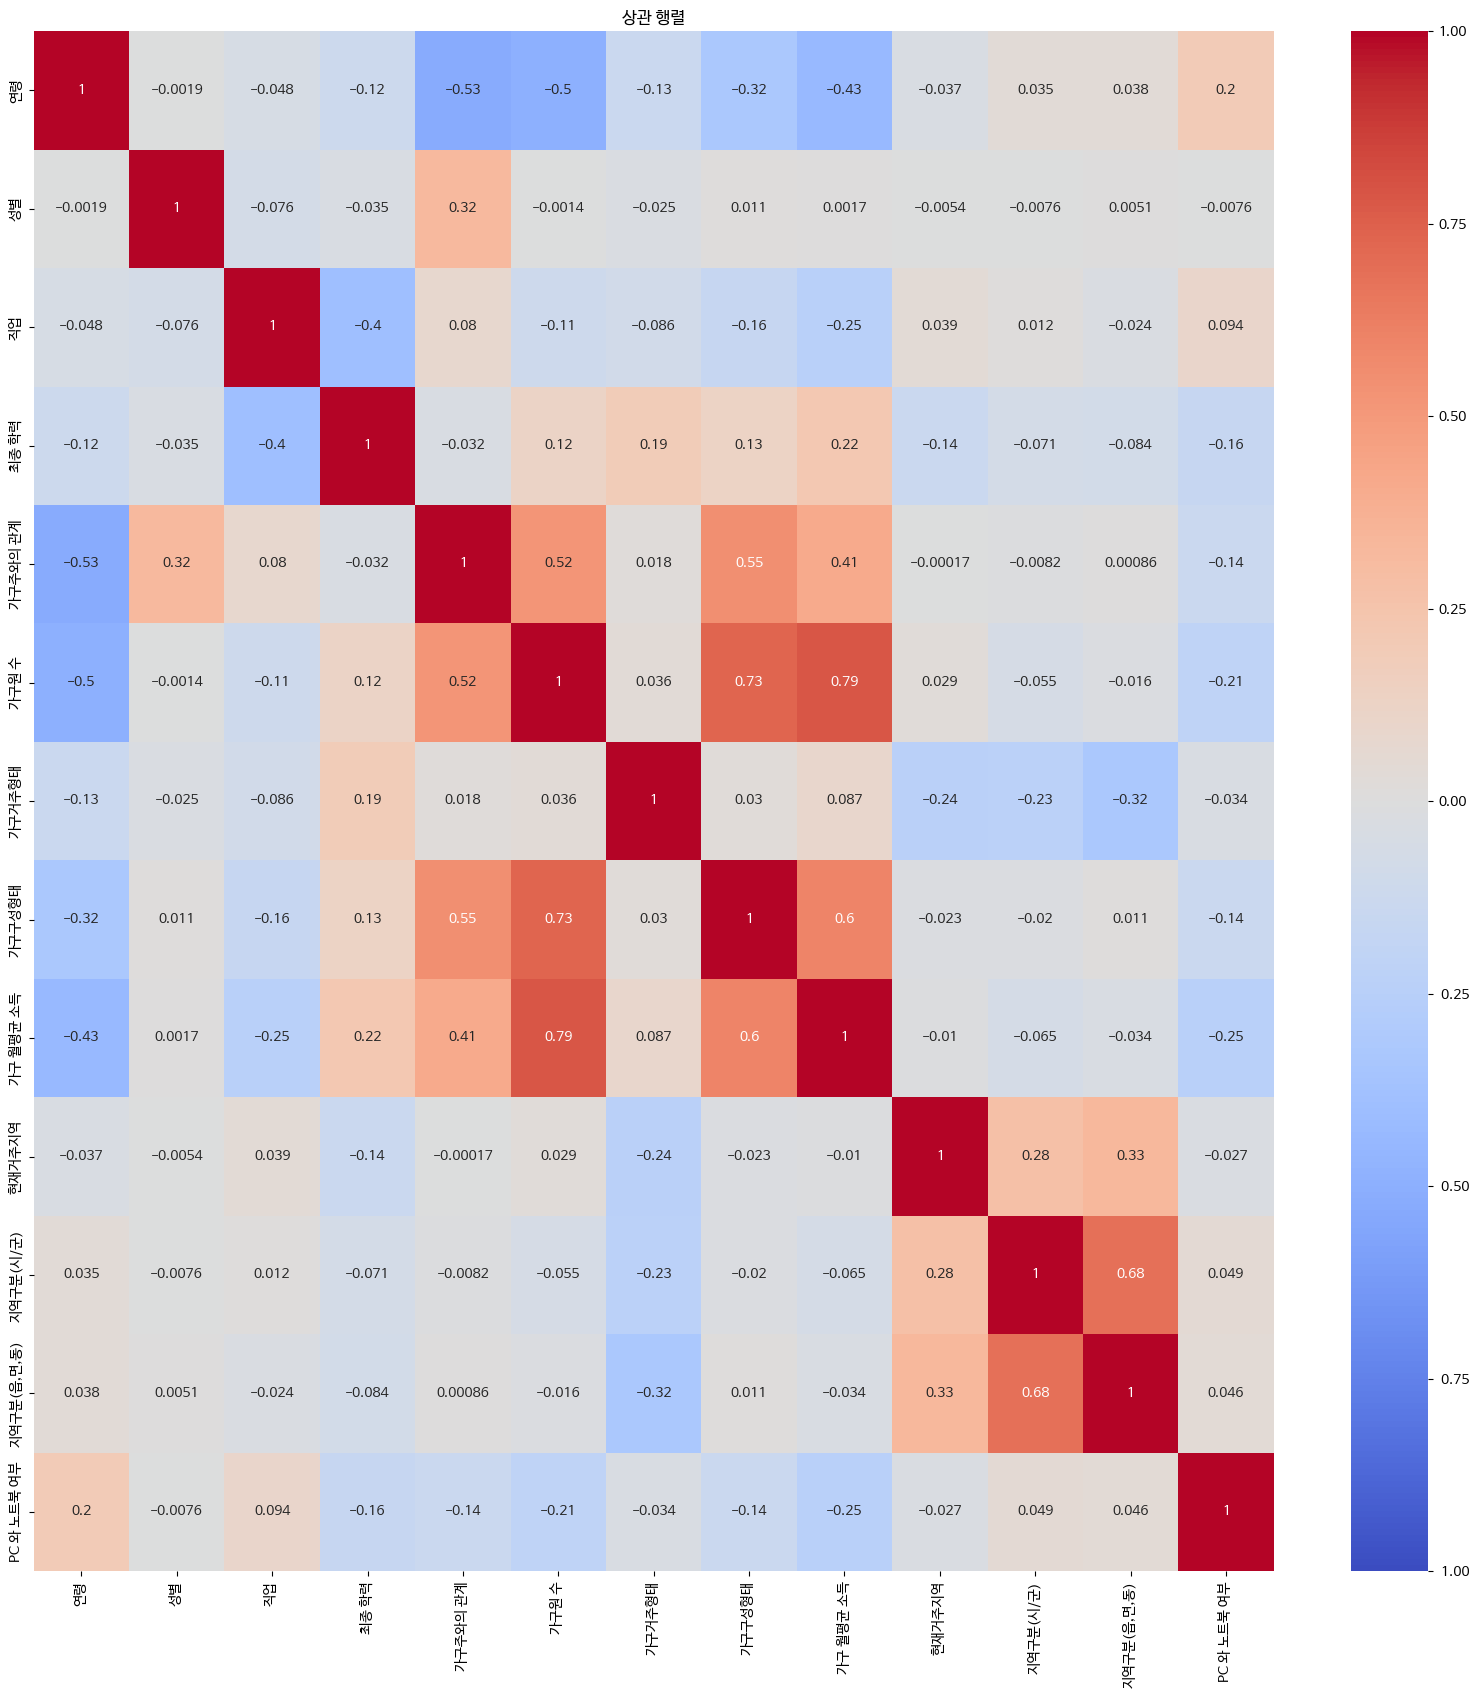

In [ ]:
# 특정 열들만 선택
#selected_columns = ['DDQ1', 'DDQ2', 'DDQ3', 'DDQ4', 'DDQ5', 'DDQ6', 'DDQ7', 'DDQ8', 'DDQ9', 'DDQ101', 'DDQ102', 'DDQ103','PC 와 노트북 여부']
selected_columns=['연령', '성별', '직업', '최종 학력', '가구주와의 관계', '가구원 수', '가구거주형태', '가구구성형태','가구 월평균 소득', '현재거주지역', '지역구분(시/군)', '지역구분(읍,면,동)','PC 와 노트북 여부']
df_selected = df[selected_columns]

# 상관 행렬 계산
correlation_matrix = df_selected.corr()

# 상관 행렬 시각화
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('상관 행렬')
plt.show()

<H3> 분석 결과
-가구 월평균 소득 이 가장 큰 영향을 미쳤으며 연령, 가구원 수 ,가구주와의 관계 , 가구구성형태 가 상관관계가 높게 나옴



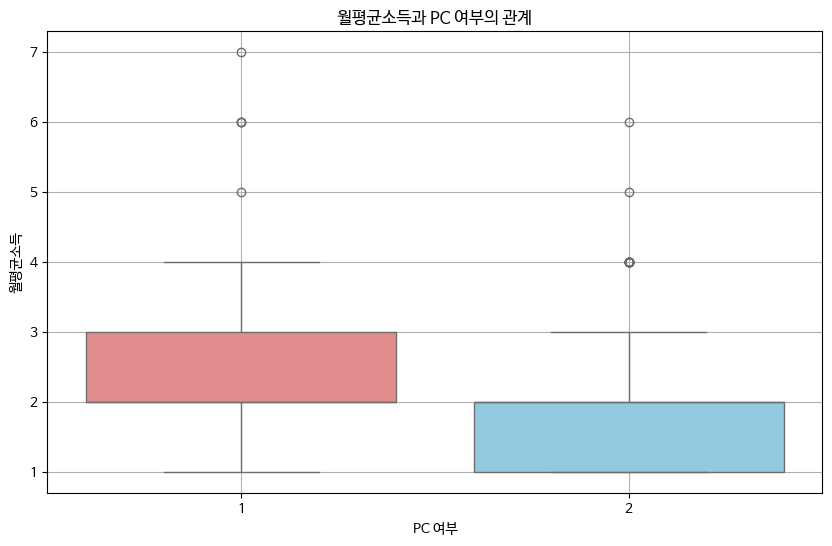

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예제 데이터 생성 (임의의 데이터로 대체)
data = {
    'PC 여부': df['PC 와 노트북 여부'],
    '월평균소득': df['가구 월평균 소득']
}

data = pd.DataFrame(data)

# 박스 플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='PC 여부', y='월평균소득', data=data, order=[1, 2], palette=['lightcoral', 'skyblue'])
plt.title('월평균소득과 PC 여부의 관계')
plt.xlabel('PC 여부')
plt.ylabel('월평균소득')
plt.grid(True)
plt.show()


그중 월평균 소득이 높은 사람이 PC를 가진 확률이 더 높게 다옴

In [ ]:
# 상관관계 0.1 이상인 것으로 예측
x=df[['연령','최종 학력','가구주와의 관계','가구원 수','가구구성형태','가구 월평균 소득']]
y=df['PC 와 노트북 여부']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델 선택 및 훈련
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy:.2f}')

모델 정확도: 0.84


<H1> 디지털 기술에 대한 태도에 따른 컴퓨터 여부

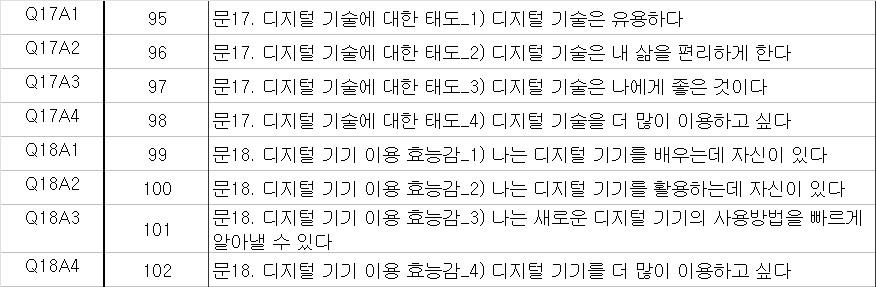

In [ ]:
x=df[['Q17A1','Q17A2','Q17A3','Q17A4','Q18A1','Q18A2','Q18A3','Q18A4']]
y=df['PC 와 노트북 여부']

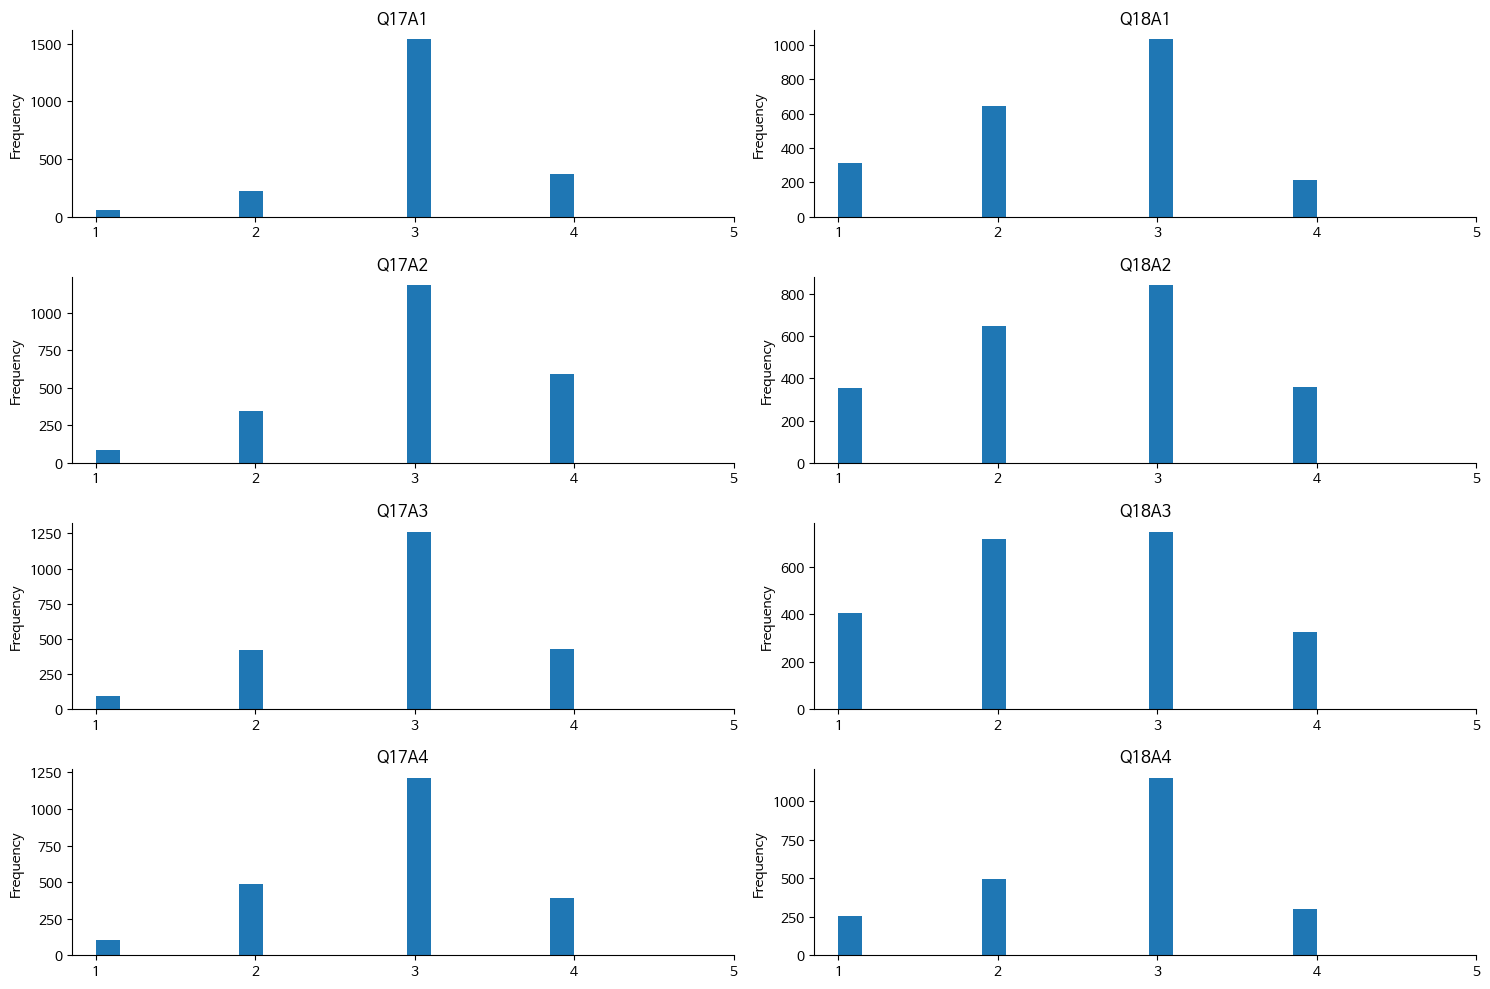

In [ ]:
# 데이터 타입을 숫자로 변환
x = x.apply(pd.to_numeric)

# 서브플롯 설정
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))

# 각 열의 히스토그램 그리기
for i, column in enumerate(x.columns):
    ax = axes[i%4,i//4]
    x[column].plot(kind='hist', bins=20, title=column, ax=ax)
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xticks([1, 2, 3, 4, 5])  # x축 틱 설정

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델 선택 및 훈련
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy:.2f}')

모델 정확도: 0.83


<H1> 전체 열로 예측

In [ ]:
x=df.drop(['PC 와 노트북 여부','PC 여부','노트북 여부'],axis=1)
y=df['PC 와 노트북 여부']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델 선택 및 훈련
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy:.2f}')

모델 정확도: 0.84


### 재환

In [ ]:
# 데이터 불러오기
df = pd.read_csv('4 저소득층_raw data.csv')

# 공백이 존재하는 열 전부 제거
whitespace_percentage = (df == ' ').mean() * 100

cols_to_drop = whitespace_percentage[whitespace_percentage > 0].index
df = df.drop(cols_to_drop, axis=1)

# 부정적인 질문의 변수 (긍정적인 응답이 1점, 부정적인 응답이 5점)
columns_to_modify = ['Q27A5', 'Q27A6', 'Q27A7']

# 열의 값을 5 - x로 변경 (부정적인 응답이 점수가 높은 문항)
df[columns_to_modify] = df[columns_to_modify].applymap(lambda x: 6 - x)

# 'DDQ1'(나이) 열을 1에서 5 사이로 스케일링
scaler = MinMaxScaler(feature_range=(1, 5))
df['DDQ1'] = scaler.fit_transform(df[['DDQ1']])

#다른 문항과 동일하게 정수 1,2,3,4,5로 반올림
df['DDQ1'] = np.round(df['DDQ1'])

# 주제선정


## Q30A7 (포털/소셜미디어에 누군가 내 저작권/명예훼손를 침해했을 때 신고하는 방법을 안다) <br> 어떤 사람들이 사이버 저작권/명예훼손 문제에 취약한가?

## Q30A7과 상관계수 높은 변수 확인

In [ ]:
#Q30A7 예측하기
target_column = 'Q30A7'
corr_matrix = df.corr()

# 특정 열과 다른 열 간의 상관계수 추출
target_corr = corr_matrix[target_column].drop(target_column)

# 절댓값 기준으로 상관계수 정렬
sorted_corr = target_corr.abs().sort_values(ascending=False).index

# 원래 상관계수도 정렬 순서대로 가져오기
sorted_target_corr = target_corr[sorted_corr]

print(f"Correlation of other columns with '{target_column}' sorted by absolute value:")
print(sorted_target_corr.head(30))

Correlation of other columns with 'Q30A7' sorted by absolute value:
Q30A6     0.902952
Q30A5     0.802492
Q30A4     0.791870
Q29A08    0.781332
Q29A09    0.778030
Q29A05    0.752598
Q29A07    0.745010
Q30A3     0.718375
Q29A06    0.718268
Q29A04    0.714930
Q29A11    0.672754
Q30A2     0.633349
Q30A1     0.618825
Q29A03    0.601909
Q29A10    0.599144
Q29A12    0.587932
Q15A1     0.579891
Q18A1     0.572004
Q18A2     0.546728
Q18A3     0.545184
Q4A5      0.540006
Q5A3      0.538994
Q15A2     0.537266
Q4A1      0.527955
Q4A7      0.527914
Q4A3      0.526440
Q4A4      0.525911
Q4A2      0.524667
Q5A7      0.518057
Q5A5      0.511576
Name: Q30A7, dtype: float64


## 다중공선성 : 독립변수 간의 선형관계가 높은 정도
##변수 1이 x일때 변수 2가 2x라면 y를 선형회귀로 예측할때 둘다넣을 필요없음


## 상관관계가 높은 변수부터 포함시키되, 다중공선성 높은 변수 제거

In [ ]:
# 상관계수 행렬 계산
corr_matrix = df.corr()

# 종속변수와 다른 열 간의 상관계수 추출
target_column = 'Q30A7'
target_corr = corr_matrix[target_column].drop(target_column)

# 절댓값 기준으로 상관계수 정렬
sorted_corr = target_corr.abs().sort_values(ascending=False).index

# 원래 상관계수도 정렬 순서대로 가져오기
sorted_target_corr = target_corr[sorted_corr]

# 다중공선성 체크 함수
def check_multicollinearity(df, var1, var2):
    correlation = df[var1].corr(df[var2])
    return abs(correlation) <= 0.8

# 채택변수 리스트 초기화
selected_vars = []

# 첫 번째로 상관관계가 높은 변수는 무조건 채택변수로 추가
selected_vars.append('Q30A4')

# 상관관계가 높은 순서대로 변수 추가
for var in sorted_corr[1:]:
    is_multicollinear = False
    for sel_var in selected_vars:
        if not check_multicollinearity(df, var, sel_var):
            is_multicollinear = True
            break
    if not is_multicollinear:
        selected_vars.append(var)

# 결과 출력
print("Selected variables:", selected_vars)

Selected variables: ['Q30A4', 'Q29A08', 'Q29A05', 'Q29A06', 'Q29A11', 'Q30A2', 'Q30A1', 'Q29A03', 'Q29A10', 'Q15A1', 'Q18A1', 'Q18A3', 'Q4A5', 'Q5A3', 'Q15A2', 'Q29A02', 'Q29A01', 'Q5A6', 'DDQ1', 'Q5A2', 'Q22A02', 'Q22A10', 'Q22A08', 'Q5A4', 'Q18A4', 'Q22A03', 'Q22A01', 'Q19A7', 'Q22A04', 'Q22A06', 'Q27A2', 'Q16A08', 'Q15A4', 'Q17A2', 'Q22A05', 'Q17A4', 'Q22C10', 'Q22C01', 'Q22C03', 'Q22C02', 'DDQ4', 'Q19A6', 'Q17A3', 'Q22A09', 'Q27A1', 'Q22C08', 'Q6', 'Q16A10', 'Q16A07', 'Q20A1', 'Q19A1', 'Q22A07', 'Q21', 'Q27A3', 'Q20A2', 'Q16A06', 'Q16A09', 'Q17A1', 'Q22C04', 'Q22C09', 'Q27A8', 'Q15A5', 'Q27A4', 'Q26', 'Q16A05', 'Q19A3', 'Q22C06', 'Q22C05', 'Q1A2', 'Q2A2', 'Q19A2', 'DDQ6', 'Q16A04', 'Q20A4', 'Q19A4', 'Q20A5', 'DDQ9', 'Q16A02', 'Q16A01', 'Q25', 'Q20A3', 'Q1A1', 'Q22C07', 'DDQ5', 'Q19A8', 'Q2A3', 'Q19A5', 'Q16A03', 'DDQ8', 'DDQ3', 'DDQ7', 'Q27A7', 'DDQ101', 'Q27A6', 'DDQ103', 'Q27A5', 'Q15A6', 'ID', 'DDQ102', 'DDQ2', 'WT_T', 'Q15A3']



## 상관계수 높은 순서대로(중복되는 내용이나 관계성이 명백한 문항 제외)

Q30A4 : 쿠키 및 방문기록을 삭제할 수 있다

Q29A08 : 음란물, 범죄, 폭력적 내용을 거르는데 필요한 스마트폰 필터링을 사용할 줄 안다

Q29A05 : 스마트워치, 냉장고, IoT 기기를 활용할 수 있다

Q29A06 : 검색 결과에서 믿을만한 정보를 구별할 수 있다

Q15A1 : 내 스스로 다른 사람의 도움 없이 문제를 해결한다

Q18A1 : 나는 디지털 기기를 배우는데 자신이 있다

Q4A5 : 나는 PC에 있는 파일을 인터넷을 통해 다른 사람에게 전송할 수 있다

Q15A2 : 인터넷 정보검색으로 도움을 얻는다


Target Q30A7 : 포털/sns에 누군가 내 권리를 침해했을 때 신고하는 방법을 안다

In [ ]:
# 변수명 한글로 변환

df['권리침해신고가능'] = df['Q30A7']

df['쿠키삭제가능'] = df['Q30A4']
df['음란물필터링가능'] = df['Q29A08']
df['스마트워치사용가능'] = df['Q29A05']
df['신뢰성있는정보구별가능'] = df['Q29A06']
df['스스로해결가능'] = df['Q15A1']
df['디지털학습자신감'] = df['Q18A1']
df['PC파일전송가능'] = df['Q4A5']
df['검색에서도움'] = df['Q15A2']

In [ ]:
# 한글 폰트 깨짐 문제 방지

import matplotlib.font_manager as fm
sel = ['권리침해신고가능', '쿠키삭제가능', '음란물필터링가능', '스마트워치사용가능', '신뢰성있는정보구별가능', '스스로해결가능', '디지털학습자신감', 'PC파일전송가능', '검색에서도움']


fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 폰트 경로
fontprop = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family=fontprop.get_name())


## 각 변수들의 점수 분포

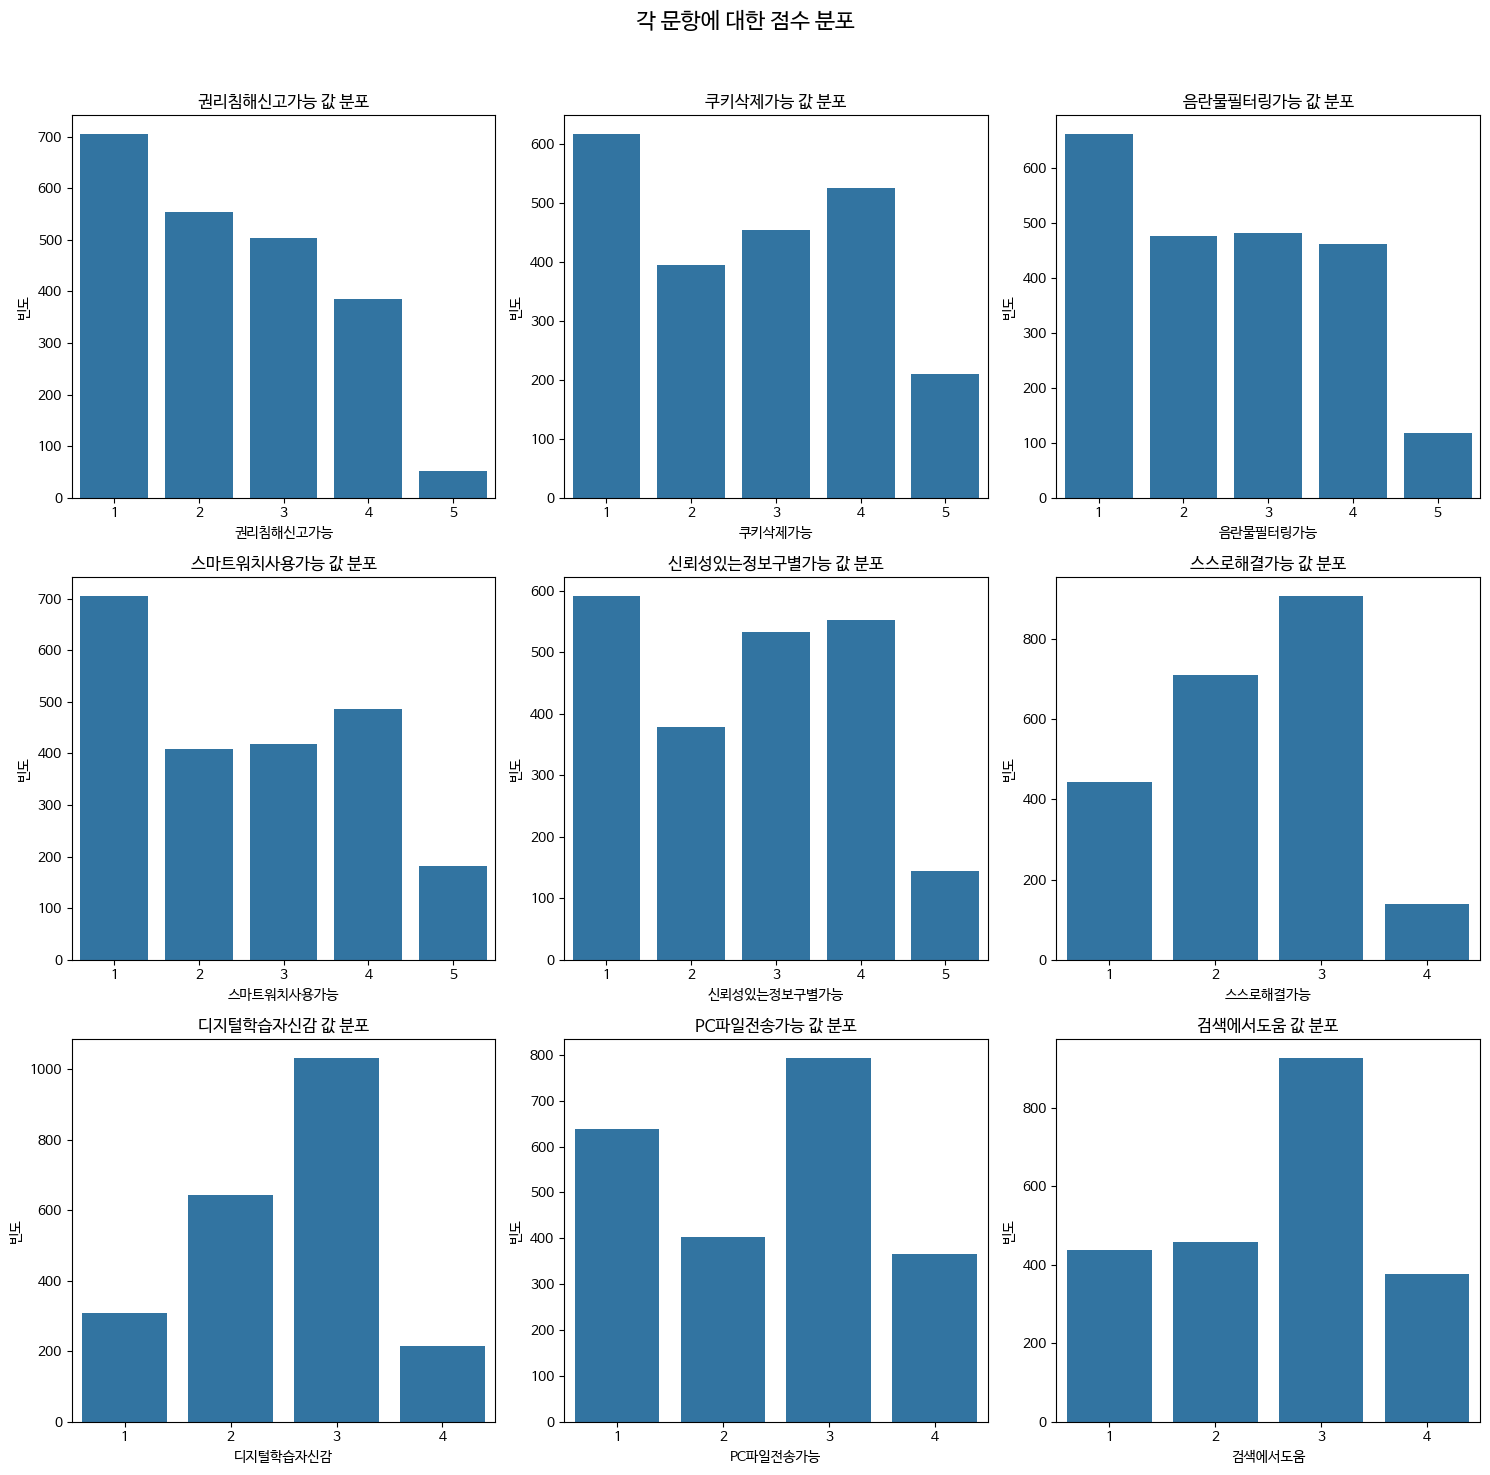

In [ ]:
# 각 변수들의 점수 분포


# 서브플롯 설정
num_vars = len(sel)
num_cols = 3
num_rows = (num_vars + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle('각 문항에 대한 점수 분포', fontsize=16)

for i, column in enumerate(sel):
    row, col = divmod(i, num_cols)
    sns.countplot(x=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{column} 값 분포')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')

# 남은 빈 서브플롯 제거
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

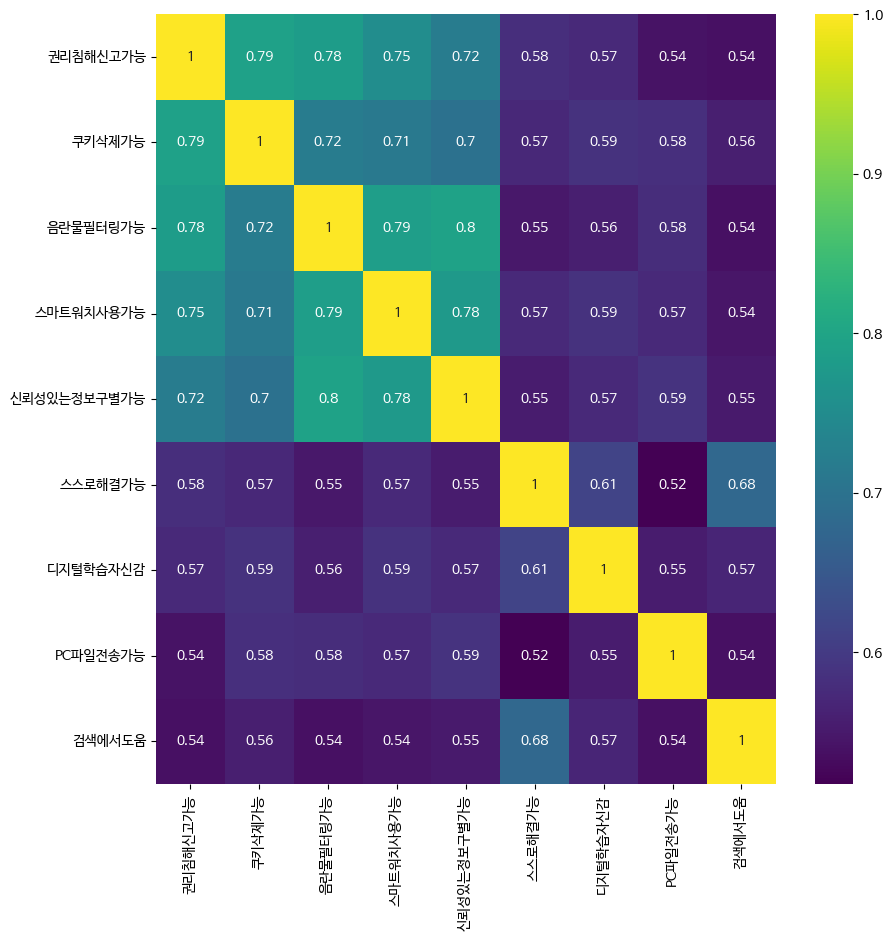

In [ ]:
# 상관관계 히트맵

corr_matrix = df[sel].corr()

plt.figure(figsize=(10, 10))

sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

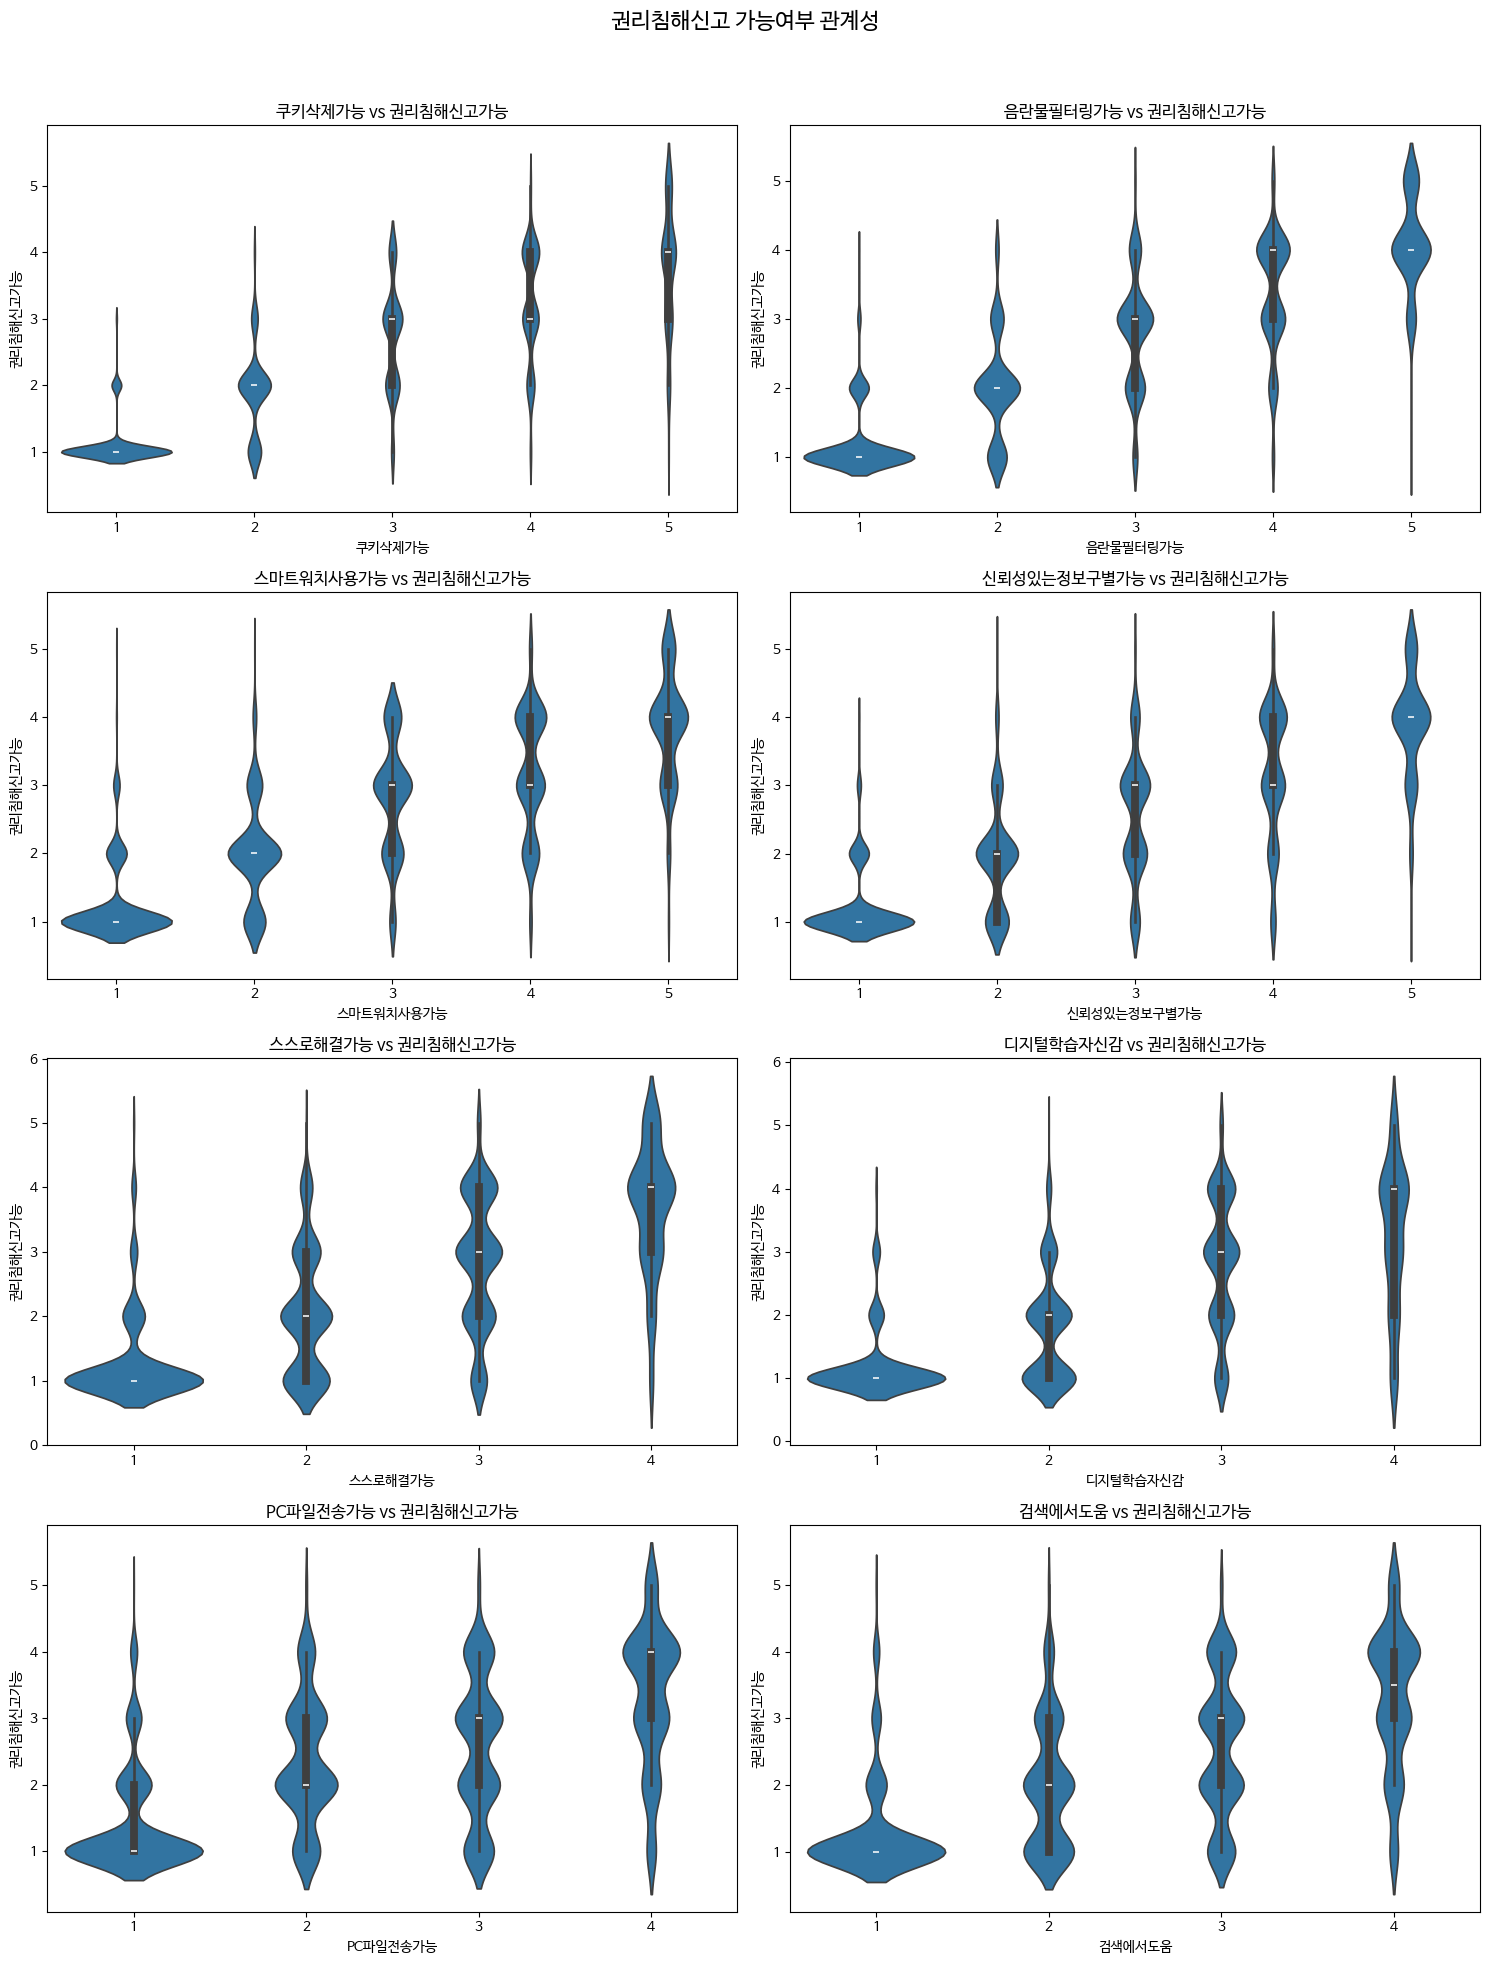

In [ ]:
## 바이올린 플롯

scolumn = ['쿠키삭제가능', '음란물필터링가능', '스마트워치사용가능', '신뢰성있는정보구별가능', '스스로해결가능', '디지털학습자신감', 'PC파일전송가능', '검색에서도움']
target = '권리침해신고가능'


# 서브플롯 설정
num_vars = len(scolumn)
num_cols = 2
num_rows = (num_vars + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle(f'권리침해신고 가능여부 관계성', fontsize=16)

for i, column in enumerate(scolumn):
    row, col = divmod(i, num_cols)

    # 바이올린 플롯 생성
    sns.violinplot(x=column, y=target, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{column} vs {target}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel(target)

# 남은 빈 서브플롯 제거
if num_vars % num_cols != 0:
    fig.delaxes(axes[num_rows - 1, -1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

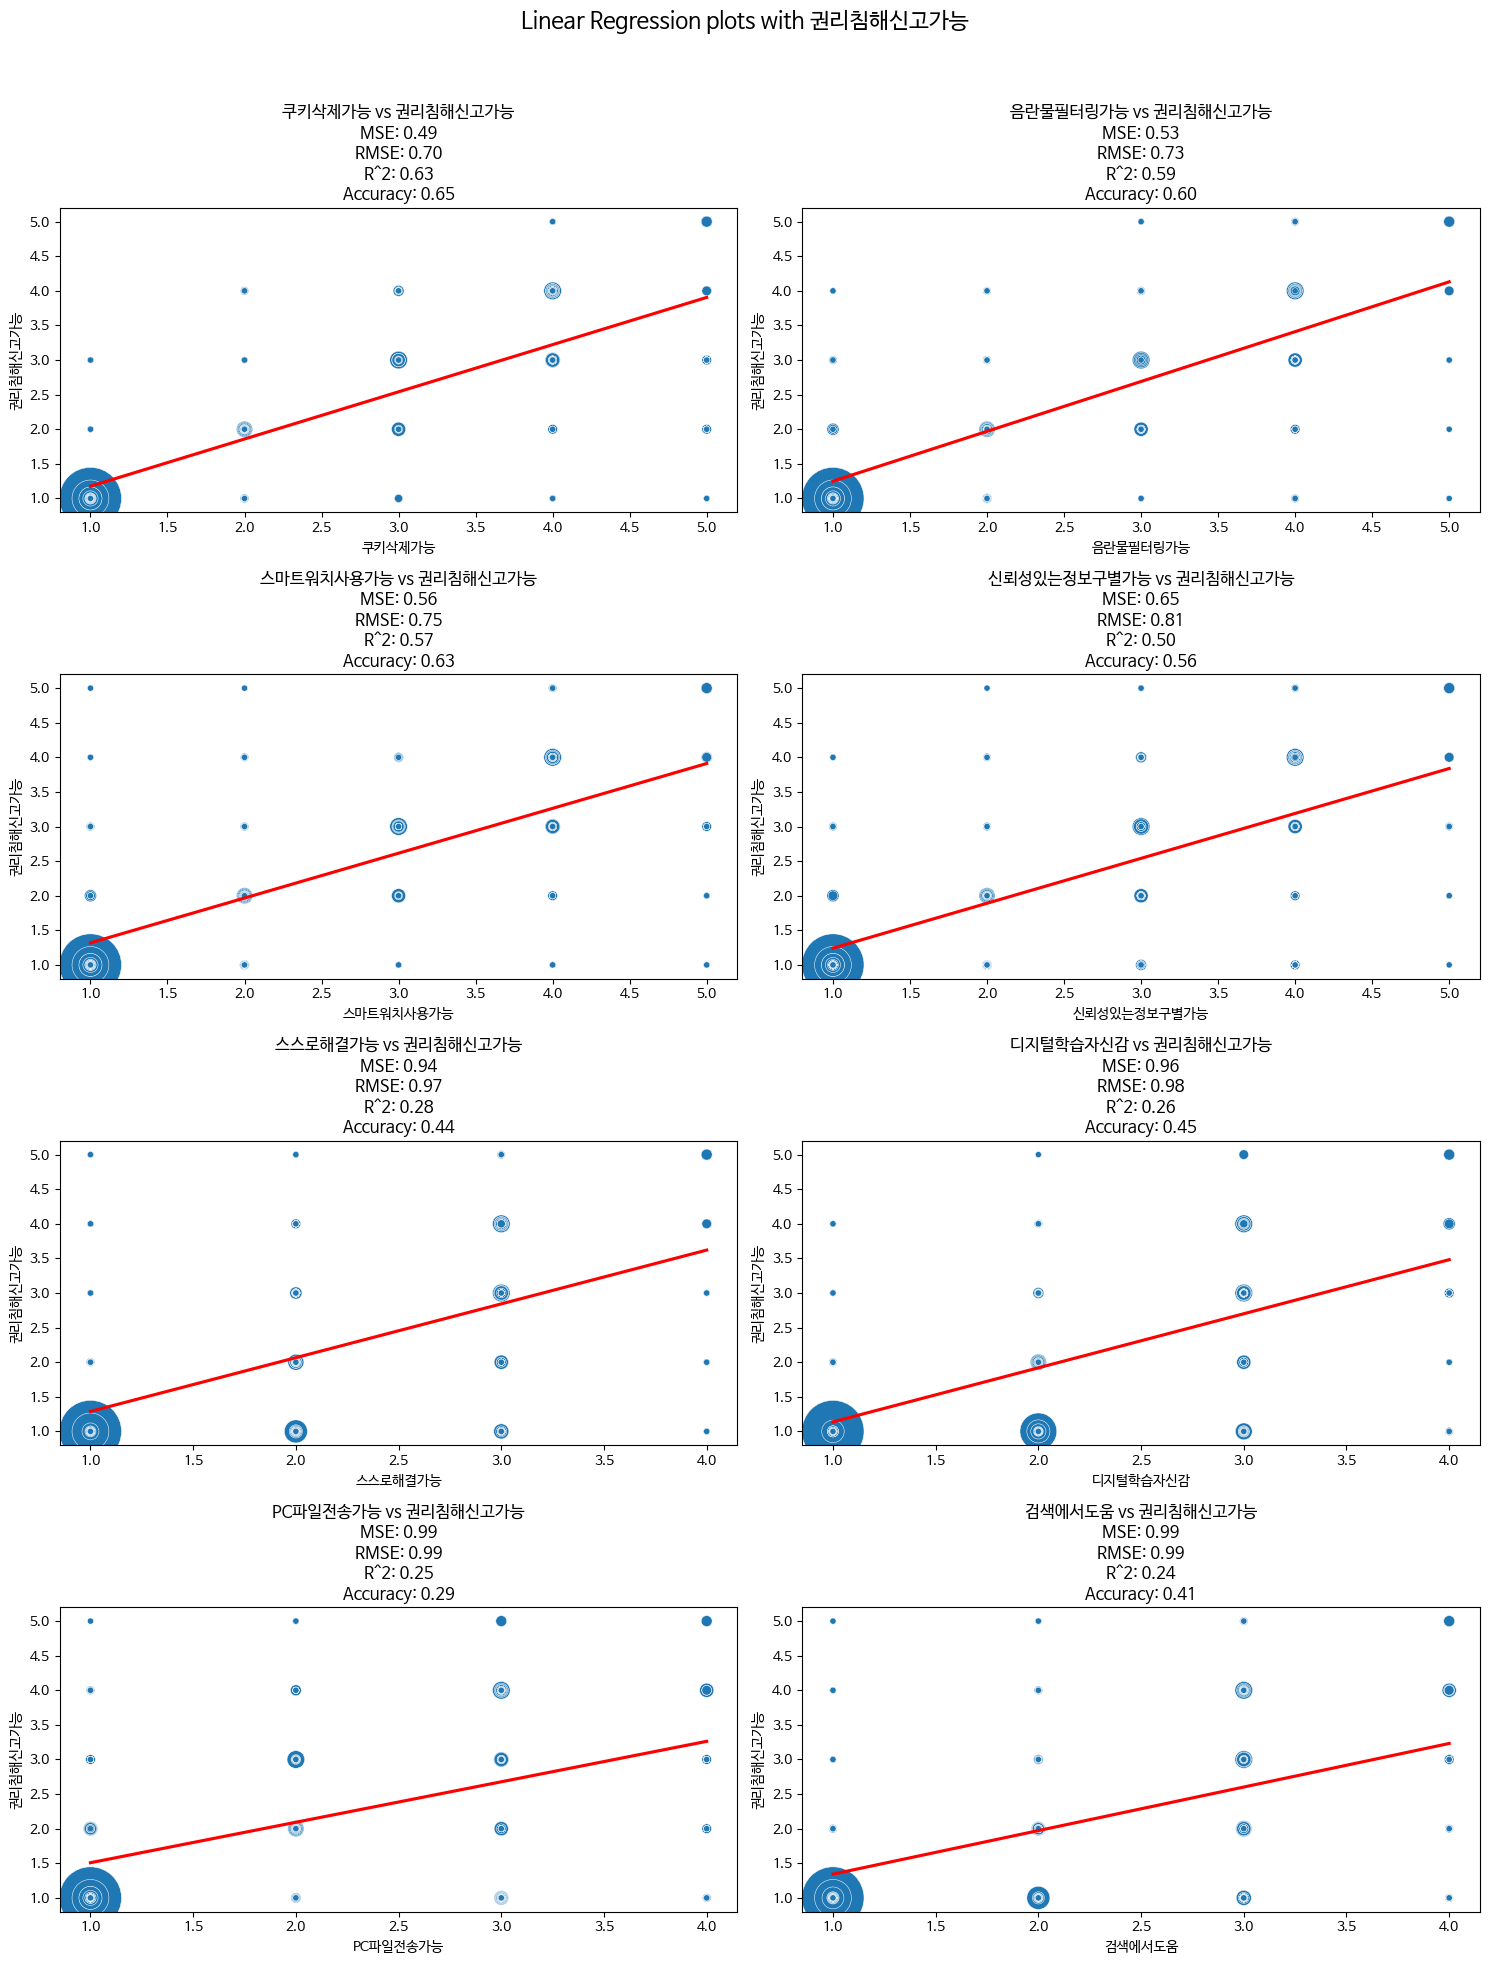

In [ ]:
import numpy as np

# 데이터 포인트의 빈도 계산
def add_counts(df, scolumn, target):
    df_counts = df.groupby(scolumn + [target]).size().reset_index(name='count')
    return df_counts

df_counts = add_counts(df, scolumn, target)

# 서브플롯 설정
num_vars = len(scolumn)
num_cols = 2
num_rows = (num_vars + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle(f'Linear Regression plots with {target}', fontsize=16)

for i, column in enumerate(scolumn):
    row, col = divmod(i, num_cols)

    X = df[[column]]
    y = df[target]

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 선형 회귀 모델 학습 및 평가
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred_lin = lin_reg.predict(X_test)
    mse_lin = mean_squared_error(y_test, y_pred_lin)
    r2_lin = r2_score(y_test, y_pred_lin)

    rmse_lin = np.sqrt(mse_lin)


    y_pred_rounded = np.round(y_pred_lin)
    accuracy = accuracy_score(y_test, y_pred_rounded)

    # 빈도 데이터프레임에서 해당 컬럼만 추출
    plot_data = df_counts[[column, target, 'count']]

    # 회귀 플롯 생성
    sns.scatterplot(x=column, y=target, size='count', data=plot_data, ax=axes[row, col], legend=False, sizes=(20, 2000))
    sns.regplot(x=column, y=target, data=df, ax=axes[row, col], ci=None, line_kws={'color': 'red'}, scatter=False)
    axes[row, col].set_title(f'{column} vs {target}\nMSE: {mse_lin:.2f}\nRMSE: {rmse_lin:.2f}\nR^2: {r2_lin:.2f}\nAccuracy: {accuracy:.2f}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel(target)

# 남은 빈 서브플롯 제거
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 단일변수 : 쿠키삭제가능, 음란물필터링가능, 스마트워치사용가능, 신뢰성있는정보구별 가능까지만 의미있어보임

## 상관관계 높은 변수부터 추가하여 다중선형회귀

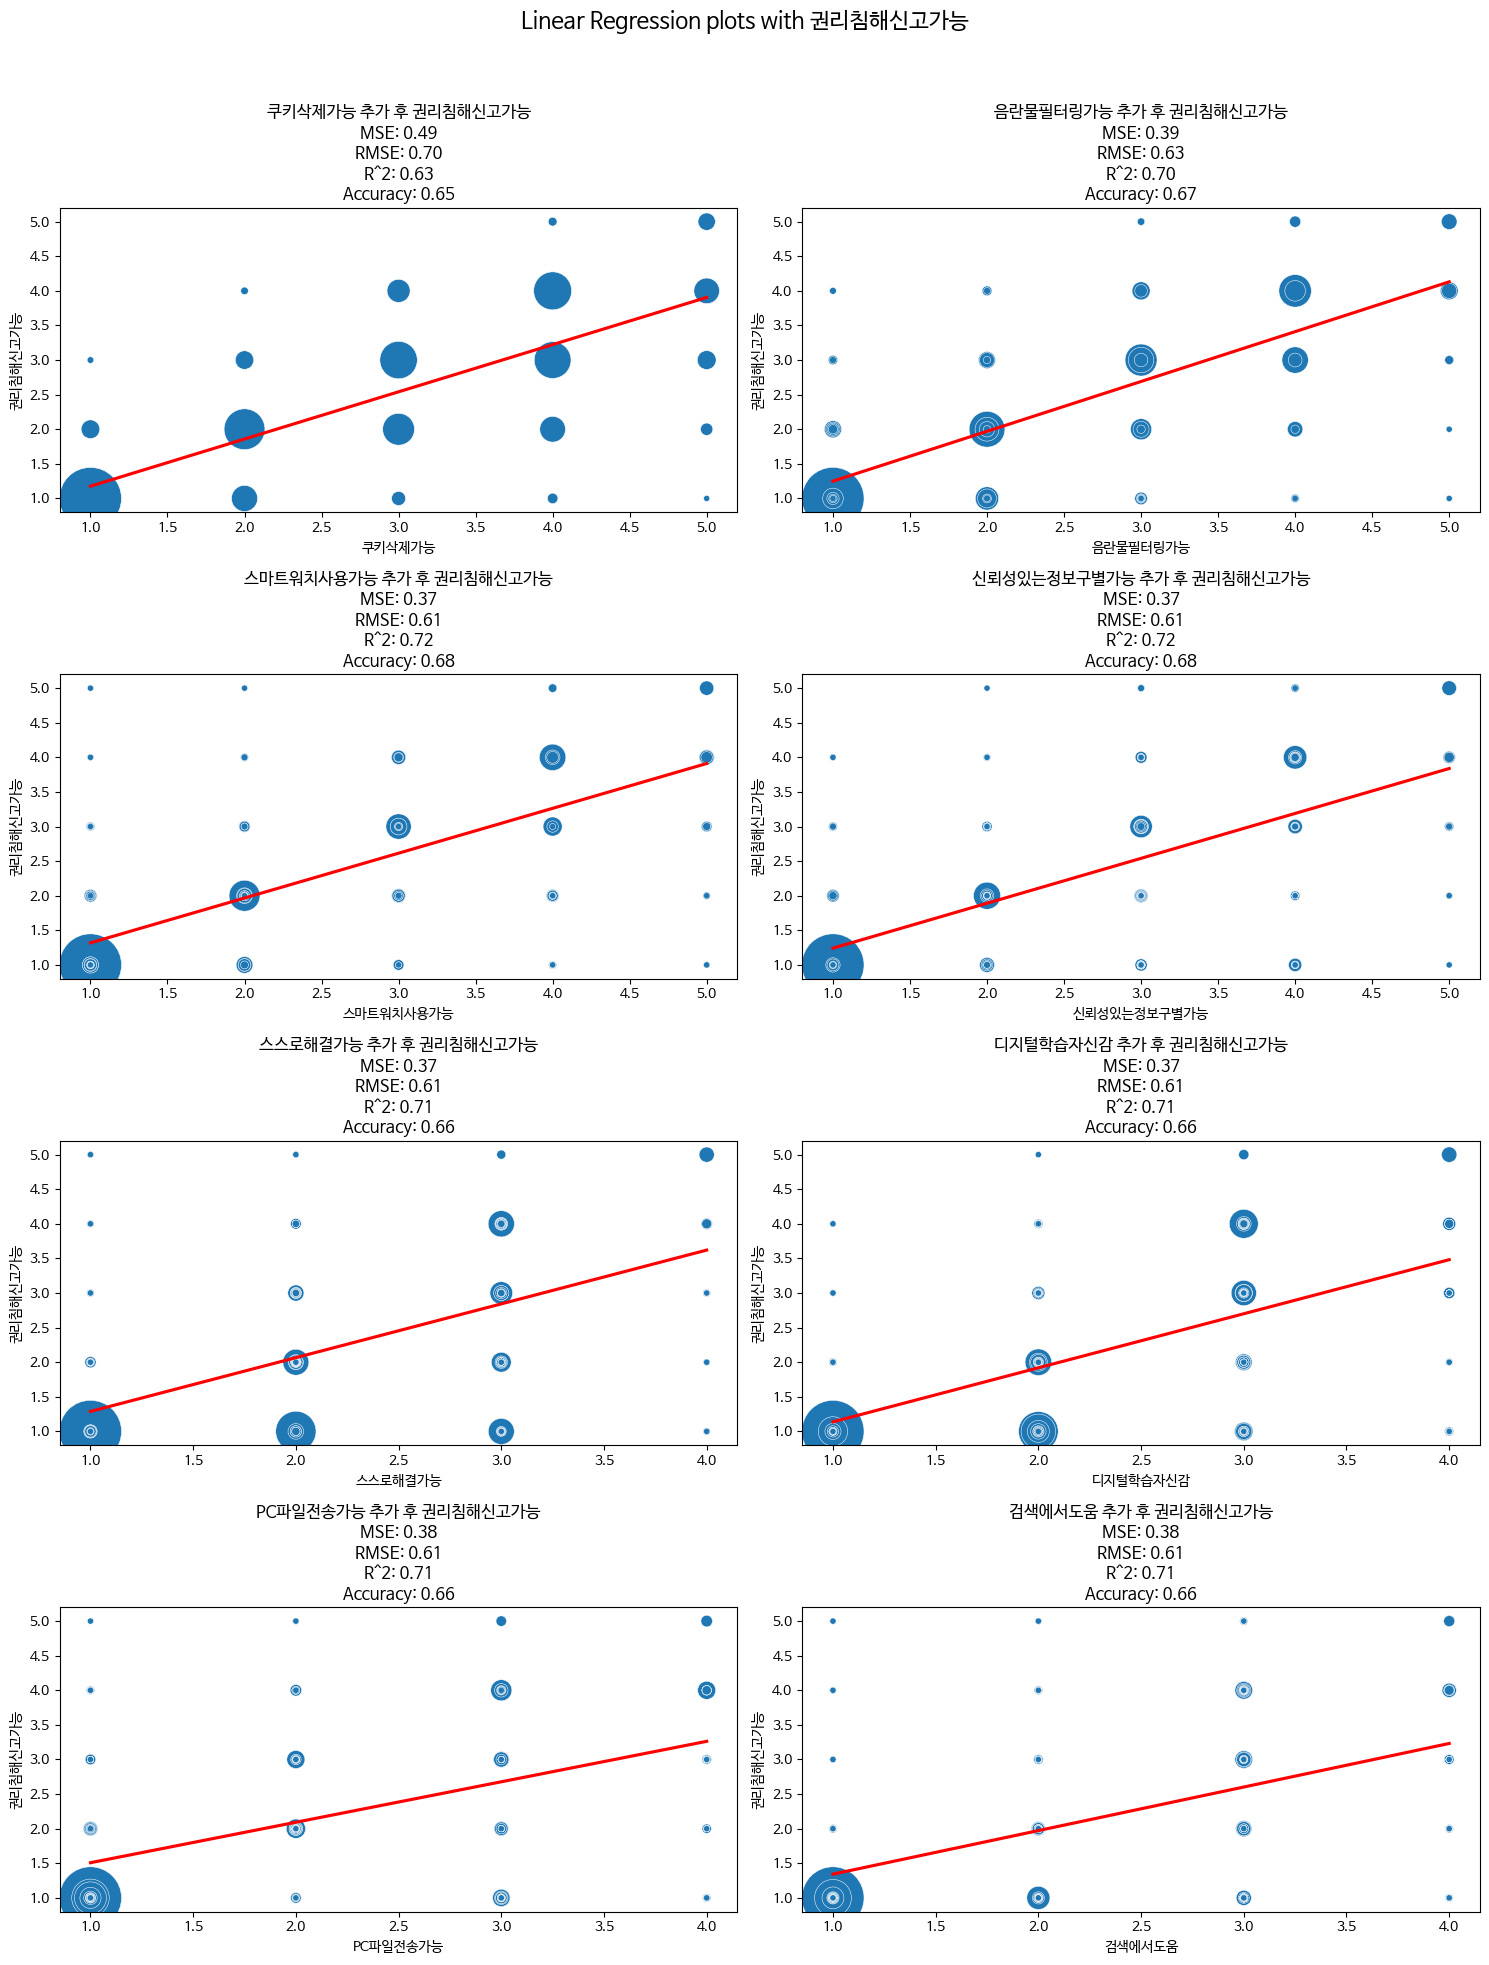

In [ ]:
s = []

# 서브플롯 설정
num_vars = len(scolumn)
num_cols = 2
num_rows = (num_vars + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle(f'Linear Regression plots with {target}', fontsize=16)

for i, column in enumerate(scolumn):
    row, col = divmod(i, num_cols)
    s.append(column)
    X = df[s]
    y = df[target]

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 선형 회귀 모델 학습 및 평가
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred_lin = lin_reg.predict(X_test)
    mse_lin = mean_squared_error(y_test, y_pred_lin)
    rmse_lin = np.sqrt(mse_lin)


    r2_lin = r2_score(y_test, y_pred_lin)

    y_pred_rounded = np.round(y_pred_lin)
    accuracy = accuracy_score(y_test, y_pred_rounded)

    # 데이터 포인트의 빈도 계산
    plot_data = df.groupby(s + [target]).size().reset_index(name='count')

    # 회귀 플롯 생성
    sns.scatterplot(x=column, y=target, size='count', data=plot_data, ax=axes[row, col], legend=False, sizes=(20, 2000))
    sns.regplot(x=column, y=target, data=df, ax=axes[row, col], ci=None, line_kws={'color': 'red'}, scatter=False)
    axes[row, col].set_title(f'{column} 추가 후 {target}\nMSE: {mse_lin:.2f}\nRMSE: {rmse_lin:.2f}\nR^2: {r2_lin:.2f}\nAccuracy: {accuracy:.2f}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel(target)

# 남은 빈 서브플롯 제거
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

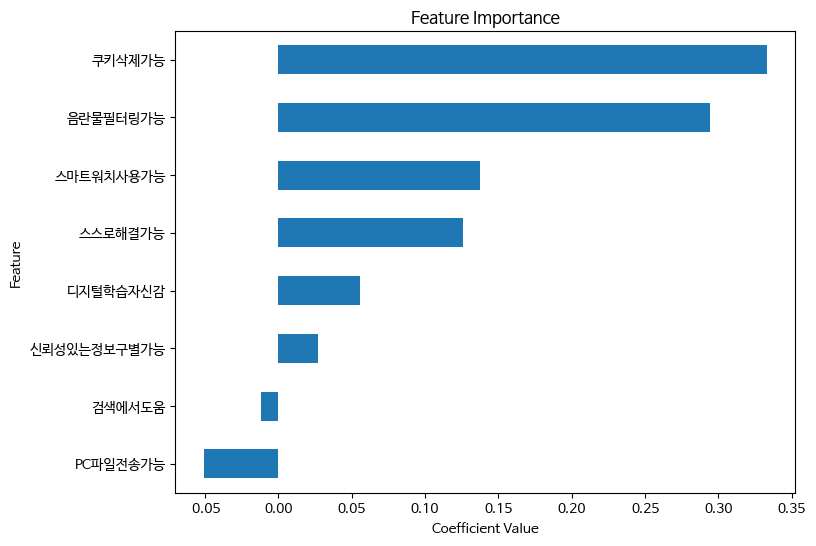

In [ ]:
# 중요 변수 플롯 생성
coefficients = pd.Series(lin_reg.coef_, index=s)
coefficients = coefficients.sort_values()

plt.figure(figsize=(8, 6))
coefficients.plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

결론 : 쿠키삭제, 음란물필터링, 스마트워치사용, 디지털문제스스로해결 여부에 부정적으로 응답한 사람들이 사이버 저작권/명예훼손 문제에 취약한 것으로 보임
